In [1]:
from shared import graph, stats_utils
from src_draft.utils import LOW_IMP_FEATURES
import shared.ml_config_core as ml_config_core
import pandas as pd
from shared.ml_config_core import ModelConfigsCollection
from shared.ml_config_runner import run_tuning_for_configs_collection
from shared.definitions import TuningResult

from Draft import feature_builder_v2

import importlib
from matplotlib import pyplot as plt
import src_draft.utils as shared_utils
import seaborn as sns

In [2]:
importlib.reload(shared_utils)
shared_utils.pandas_config(pd)
shared_utils.plt_config(plt)

sns.set_theme(style="darkgrid", palette="pastel")
plt.style.use("fivethirtyeight")

In [3]:
features_matrix = feature_builder_v2.load_datasets_and_prepare_features(
    drop_meta_data=True, ds_type=feature_builder_v2.DatasetType.FULL
)

C:\Users\Paulius\AppData\Local\pypoetry\Cache\virtualenvs\ppuodz-ml-4-1-dqELbViF-py3.12\Lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\Paulius\AppData\Local\pypoetry\Cache\virtualenvs\ppuodz-ml-4-1-dqELbViF-py3.12\Lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
C:\Users\Paulius\AppData\Local\pypoetry\Cache\virtualenvs\ppuodz-ml-4-1-dqELbViF-py3.12\Lib\site-packages\woodwork\type_sys\utils.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
 

Appending previous history
Full DS size: 307511


In [4]:
features_matrix_sorted_imp = features_matrix[shared_utils.ANY_IMP_FEATURES]

#### Missing Values

In [5]:
stats_utils.nan_summary(features_matrix_sorted_imp)

Total NaN Values  Proportion NaN (%)
ExtSource2                                    660                 0.0
ExtSource3                                  60965                20.0
AmtGoodsPrice                                 278                 0.0
ExtSource1                                 173378                56.0
OwnCarAge                                  202929                66.0
MeanbureauamtCreditSumDebt                  51380                17.0
AmtAnnuity                                     12                 0.0
PrevAvgYieldGroup                           18945                 6.0
PrevCreditReceivedRequestedDiff             16454                 5.0
PrevAmtDownPaymentSum                       16454                 5.0
MaxbureaudaysCredit                         44020                14.0
MaxbureaudaysCreditEnddate                  46269                15.0
OccupationType                              96391                31.0
MaxbureaudaysEnddateFact                    77156                25.0
MeanbureauamtCreditSum                      44021                14.0
PrevLastLoanGoodsCategory                   16454                 5.0
PrevLastLoanDecisionDate                    16454                 5.0
PrevPortfolioCardsCount                     16454                 5.0
DaysLastPhoneChange                             1                 0.0
PrevRatioSumDownPaymentCredit               16681                 5.0
AmtReqCreditBureauQrt                       41519                14.0
MinbureauamtCreditSum                       44021                14.0
MeanbureauamtCreditMaxOverdue              123625                40.0
PrevHasAnyDpdMean                           16454                 5.0
MeanbureaudaysCredit                        44020                14.0
MaxbureauamtCreditSum                       44021                14.0
MaxbureauamtCreditMaxOverdue               123625                40.0
PrevContractStatusApprovedCount             16454                 5.0
PrevRatioRejectedAccepted                   16847                 5.0
PrevAcceptedToTotalRatio                    16454                 5.0
Def30CntSocialCircle                         1021                 0.0
PrevLastLoanYieldGroup                      16454                 5.0
PrevLastLoanClientType                      16454                 5.0
PrevPortfolioPosCount                       16454                 5.0
PrevAmtApplicationSum                       16454                 5.0
PrevTotalDpdSum                             16454                 5.0
MaxbureaudaysCreditUpdate                   44020                14.0
MeanbureaudaysCreditEnddate                 46269                15.0
MaxbureauamtCreditSumLimit                  65069                21.0
MeanbureauskIdBureau                        44020                14.0
MeanbureaudaysCreditUpdate                  44020                14.0
MinbureaudaysCreditUpdate                   44020                14.0
MinbureauskIdBureau                         44020                14.0
WallsmaterialMode                          156341                51.0
PrevRefusedToTotalRatio                     16454                 5.0
PrevLastLoanContractStatus                  16454                 5.0
PrevAmtApplicationMean                      16454                 5.0
PrevAmtCreditSum                            16454                 5.0
Def60CntSocialCircle                         1021                 0.0
AmtReqCreditBureauYear                      41519                14.0
MeanbureauamtCreditSumLimit                 65069                21.0
EntrancesMedi                              154828                50.0
PrevAvgNflagInsuredOnApproval               17751                 6.0
PrevDaysAfterFirstApplication               16454                 5.0
YearsBeginexpluatationMode                 150007                49.0
PrevAmtCreditMean                           16454                 5.0
PrevProductTypeWalkinCount                 

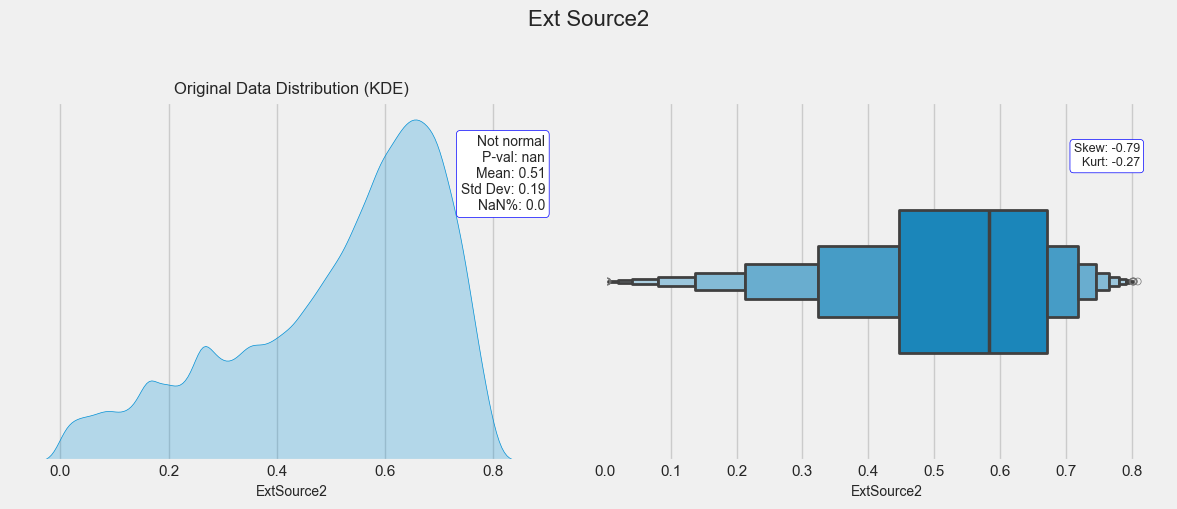

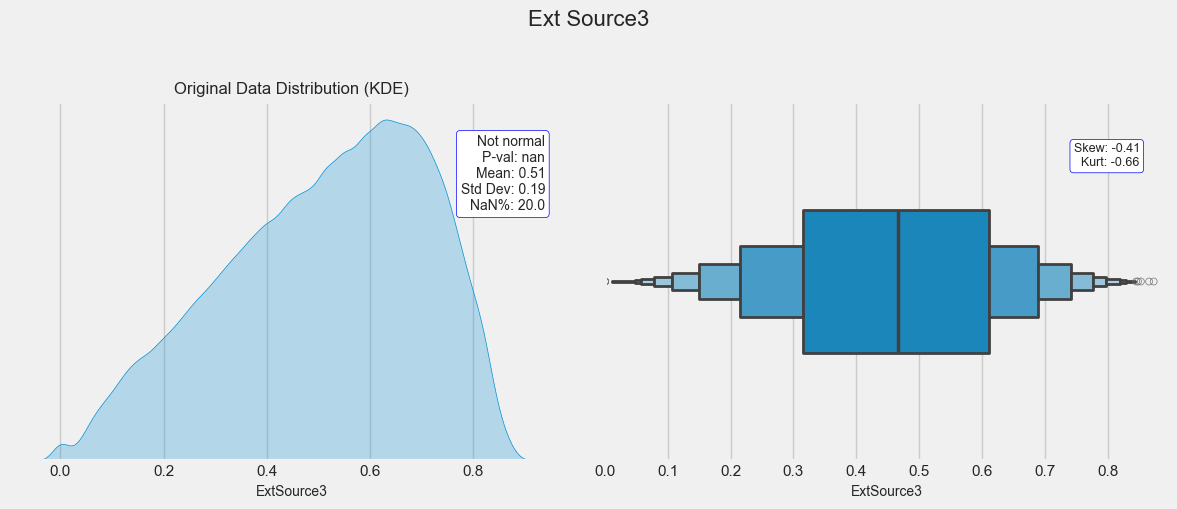

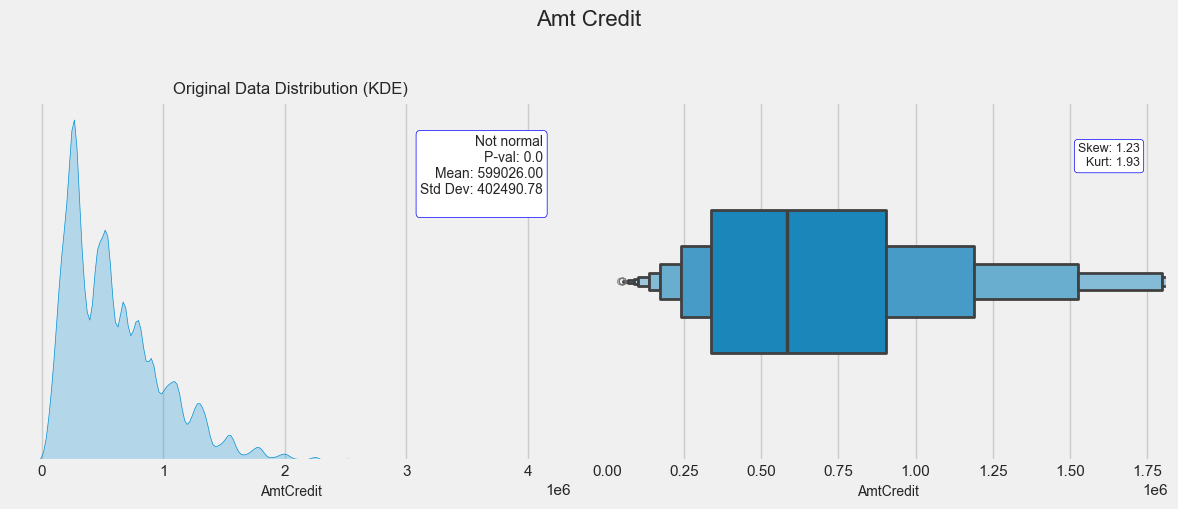

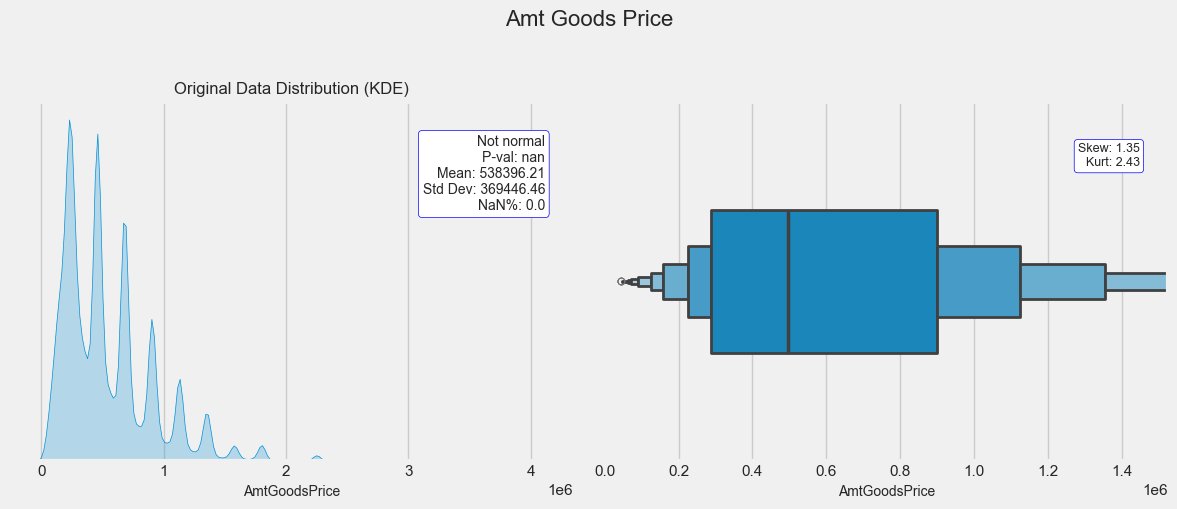

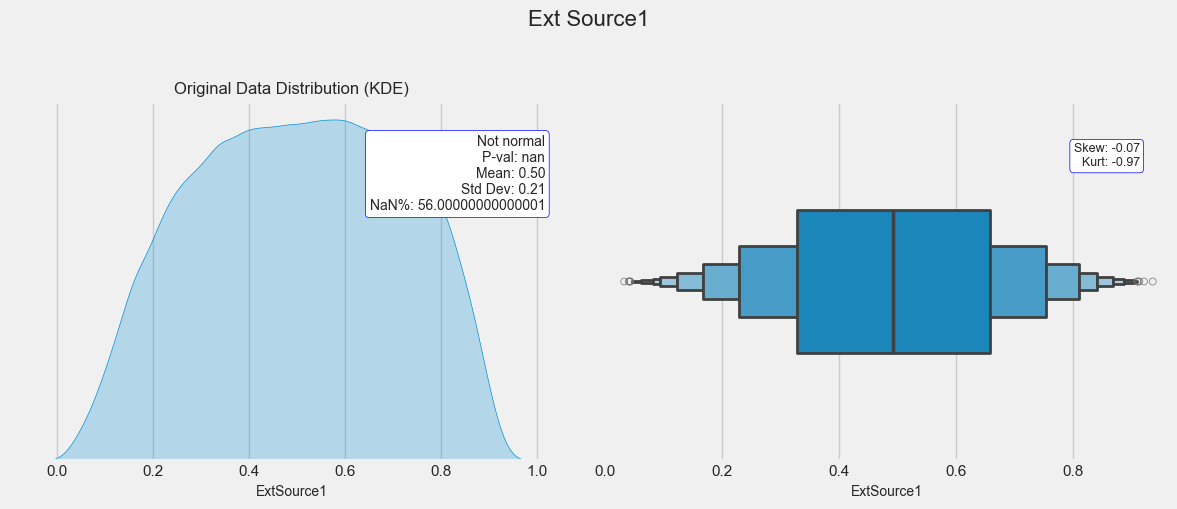

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


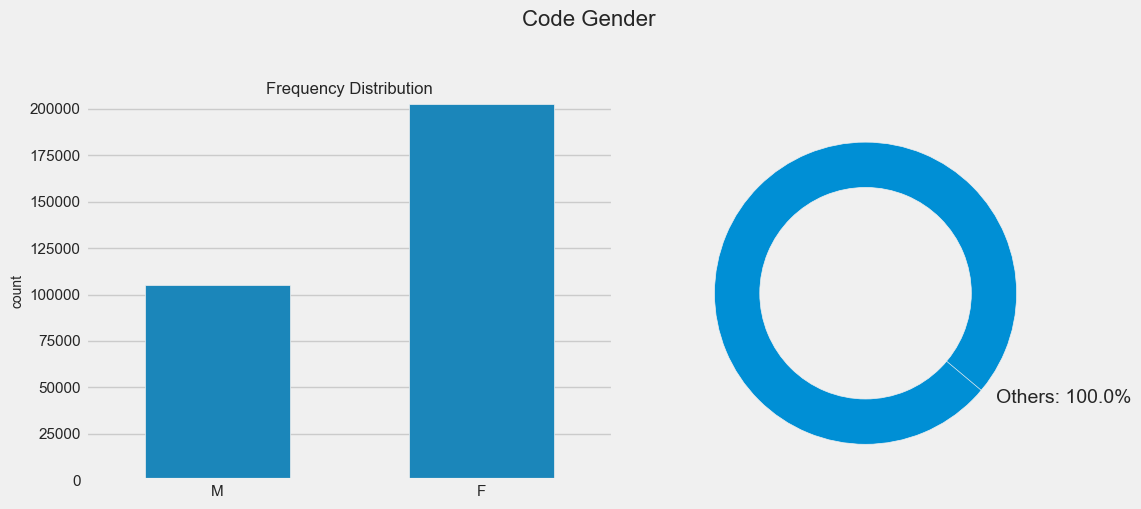

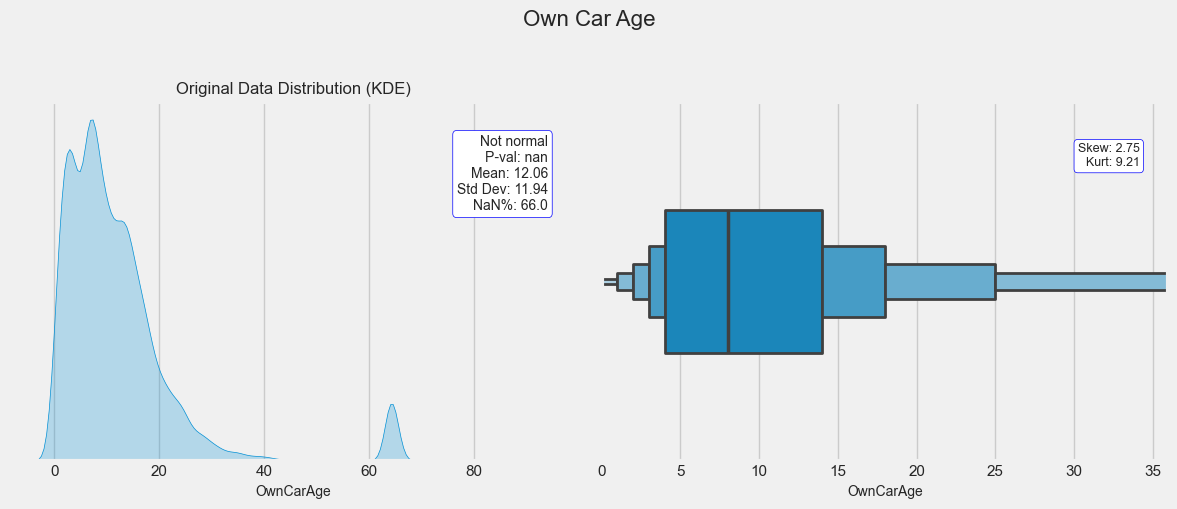

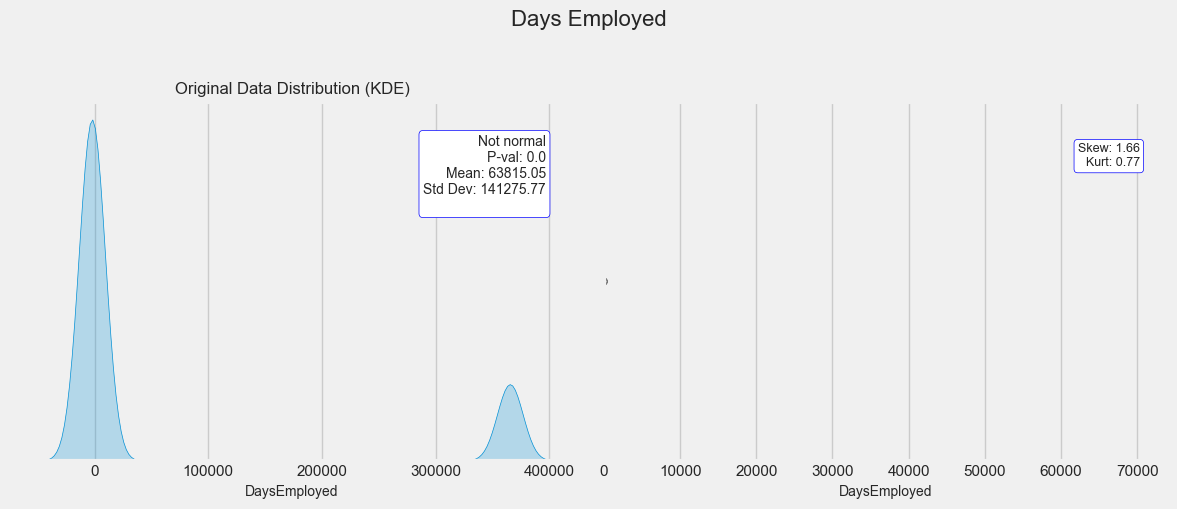

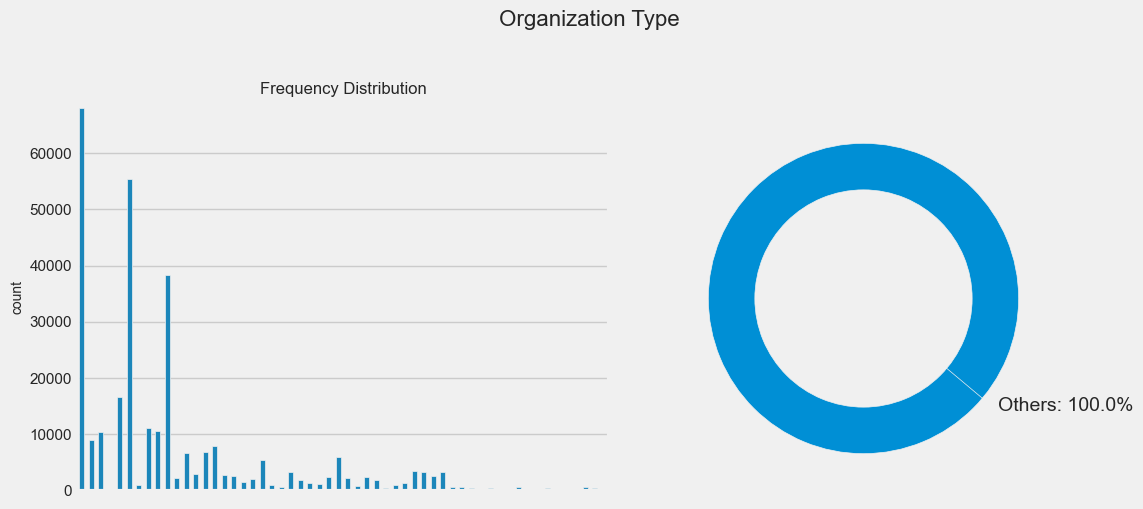

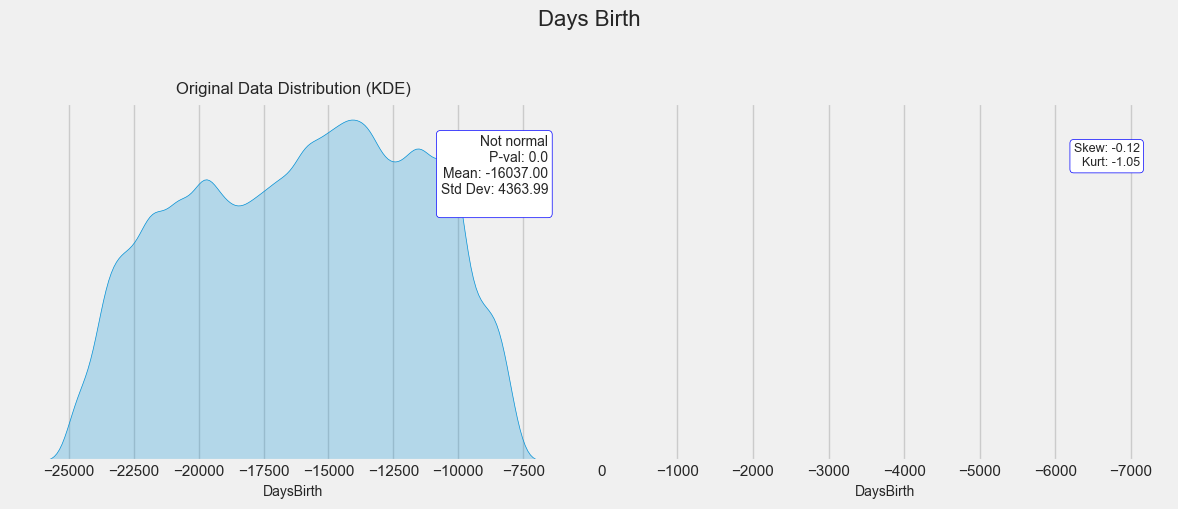

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


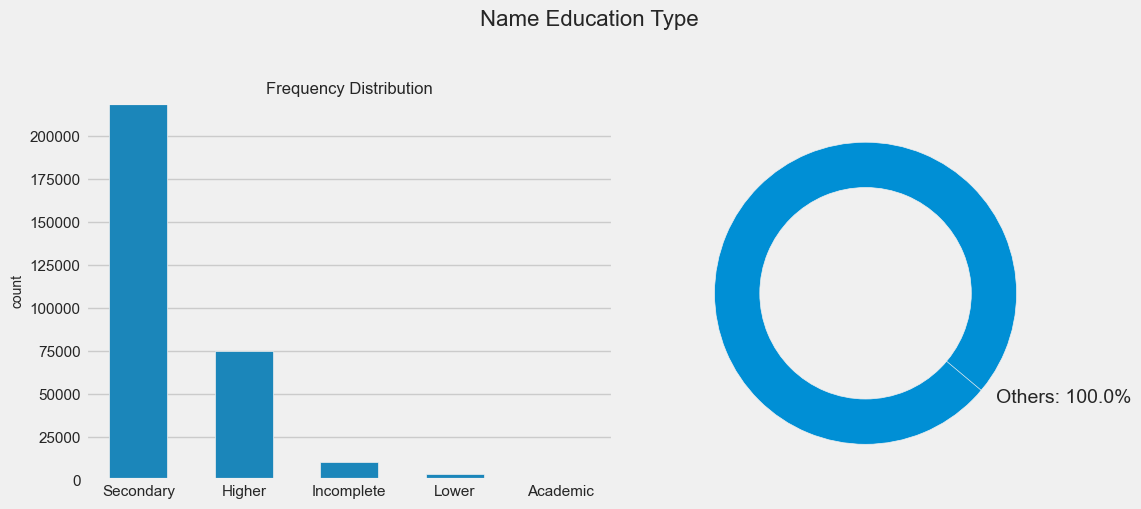

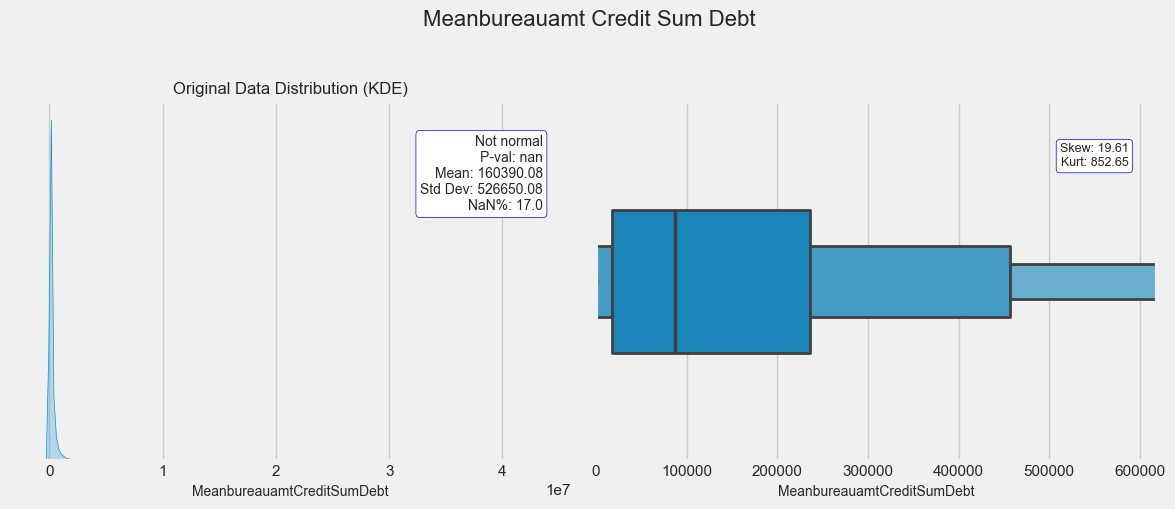

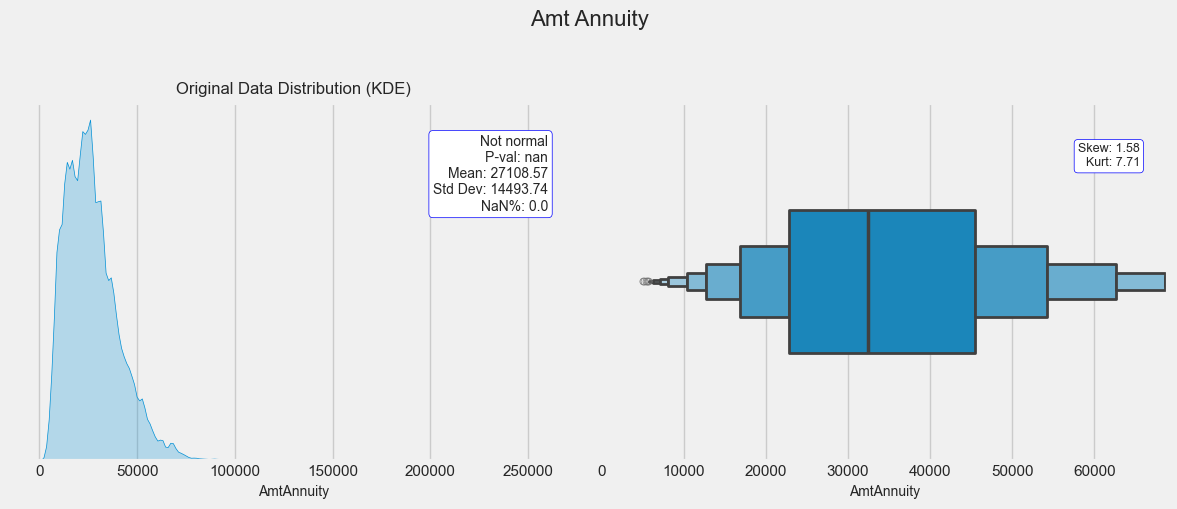

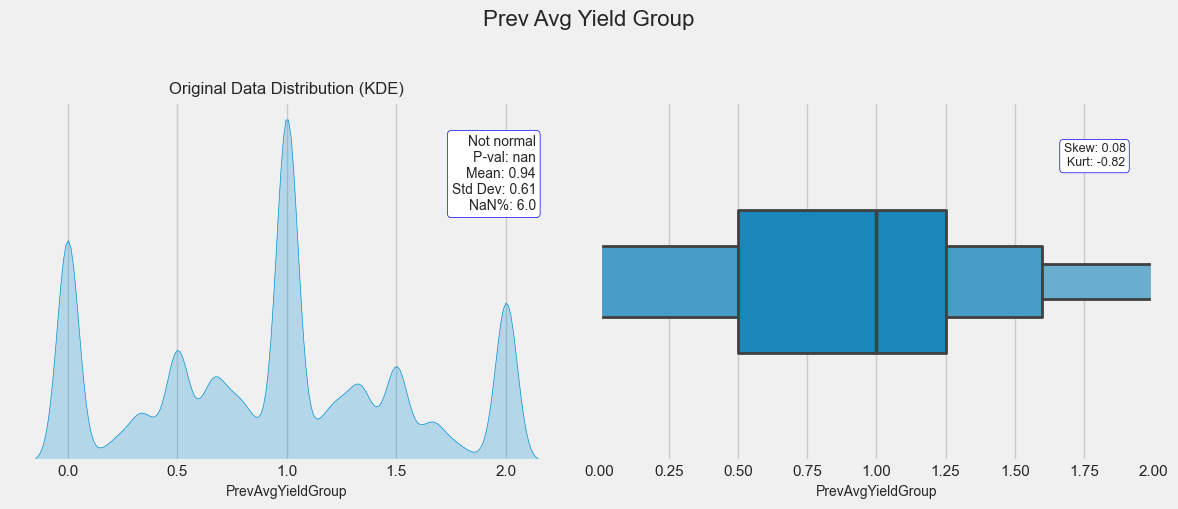

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


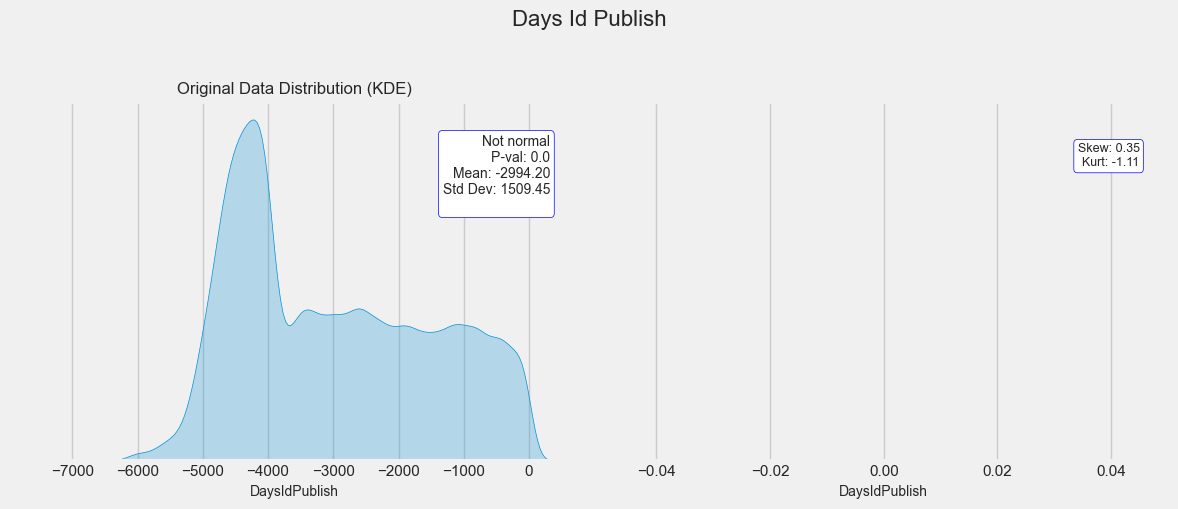

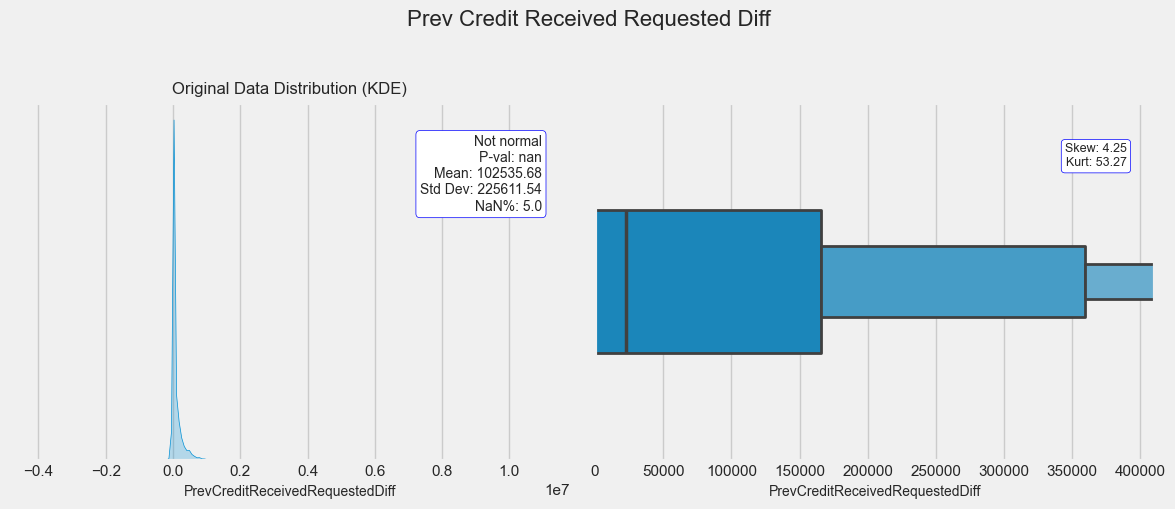

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


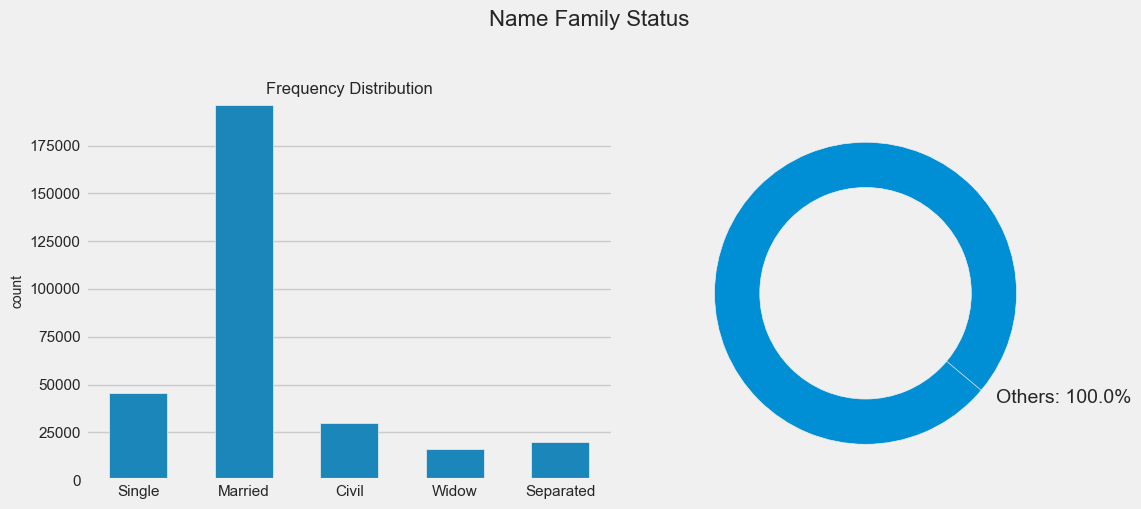

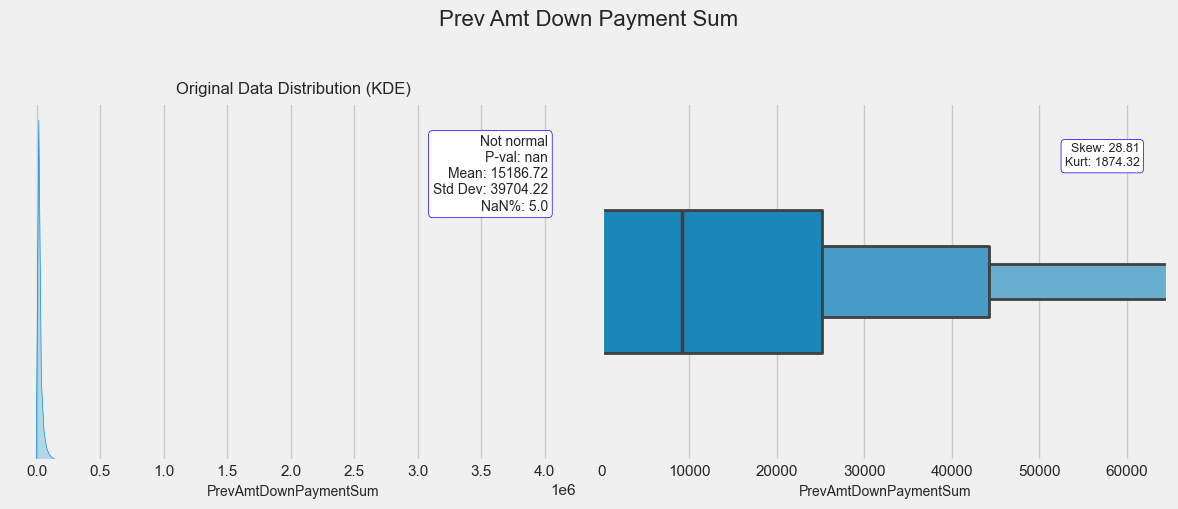

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


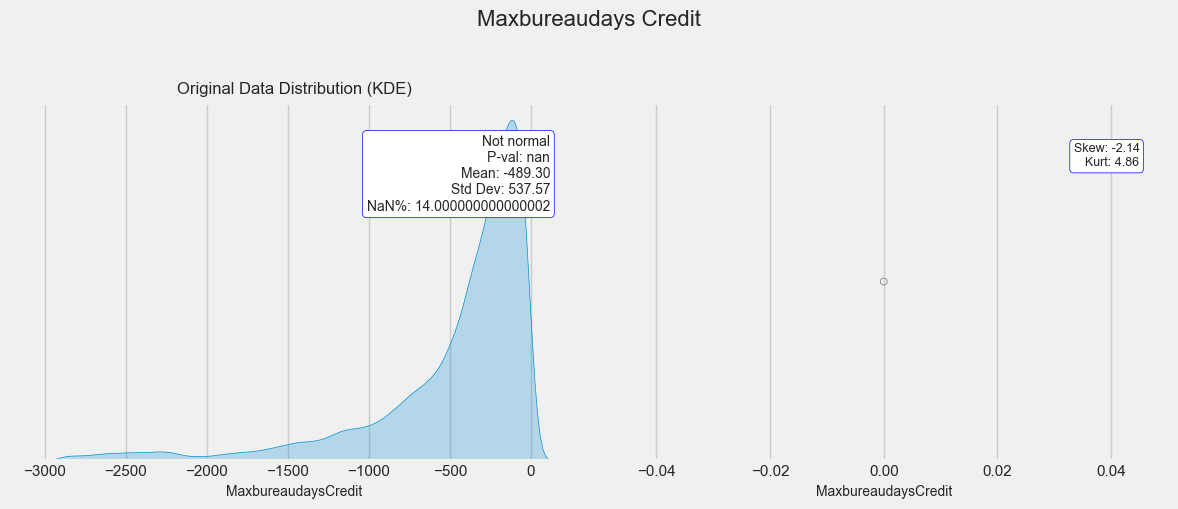

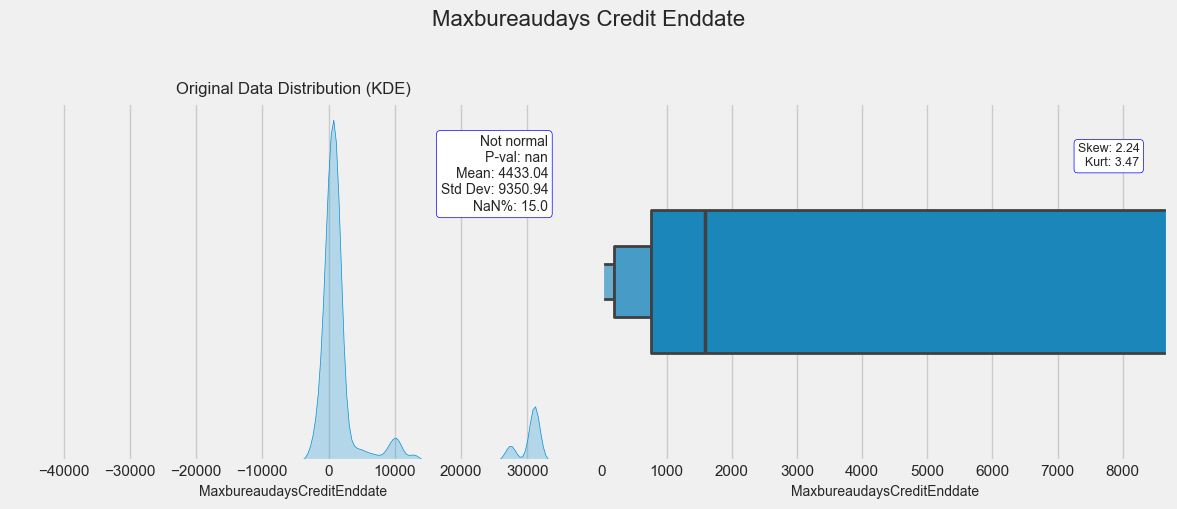

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


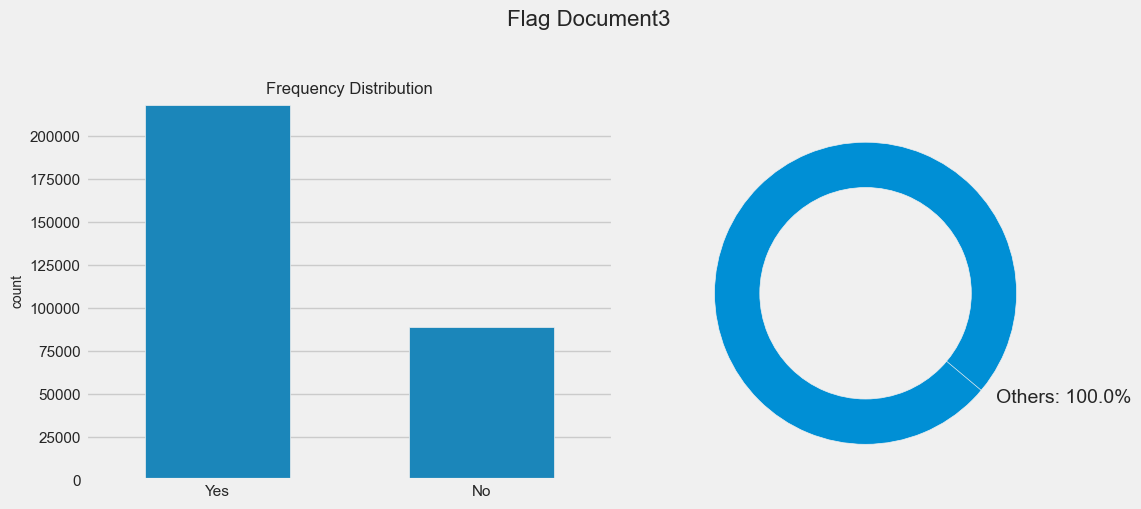

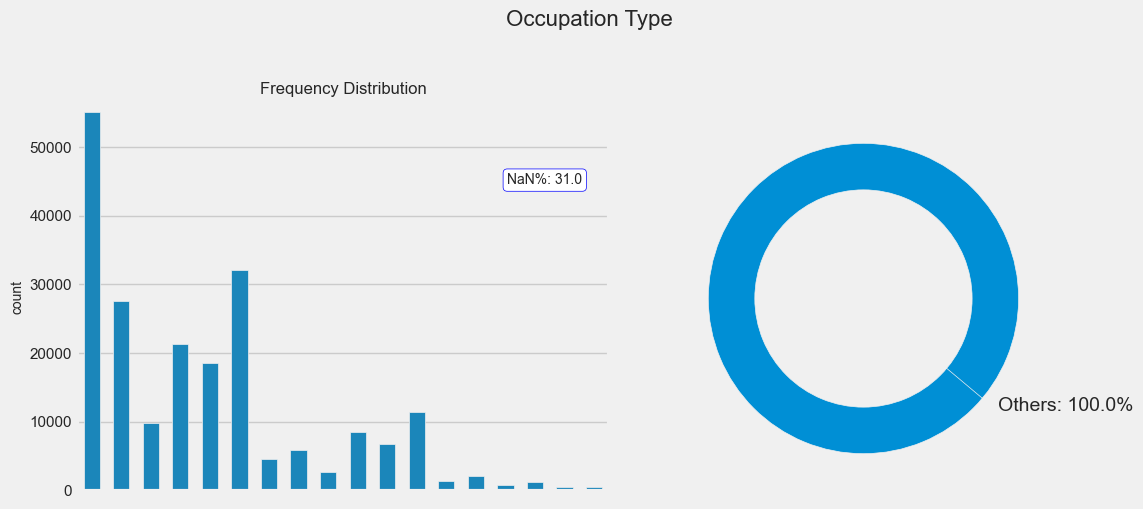

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


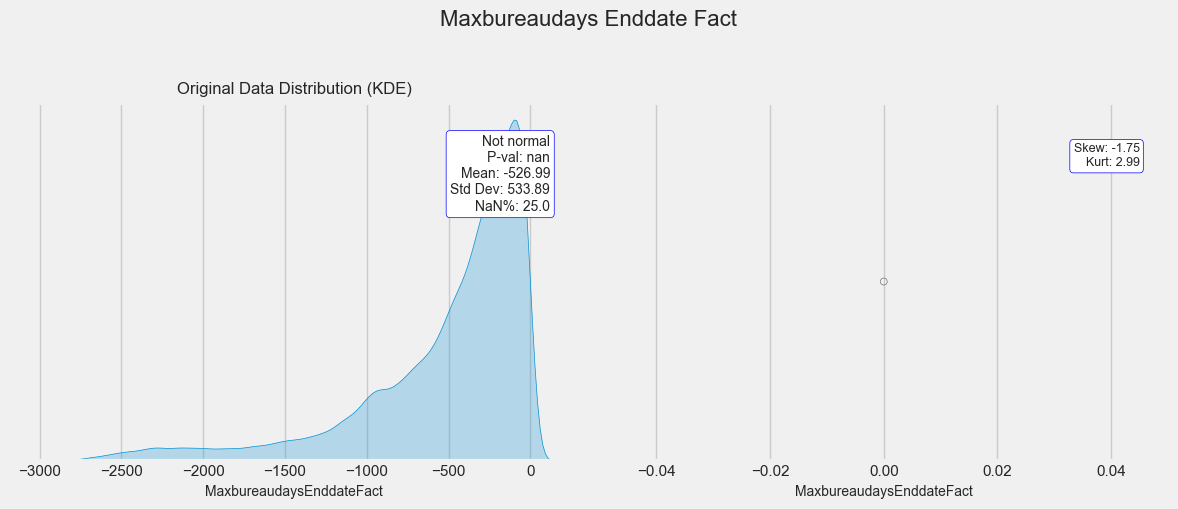

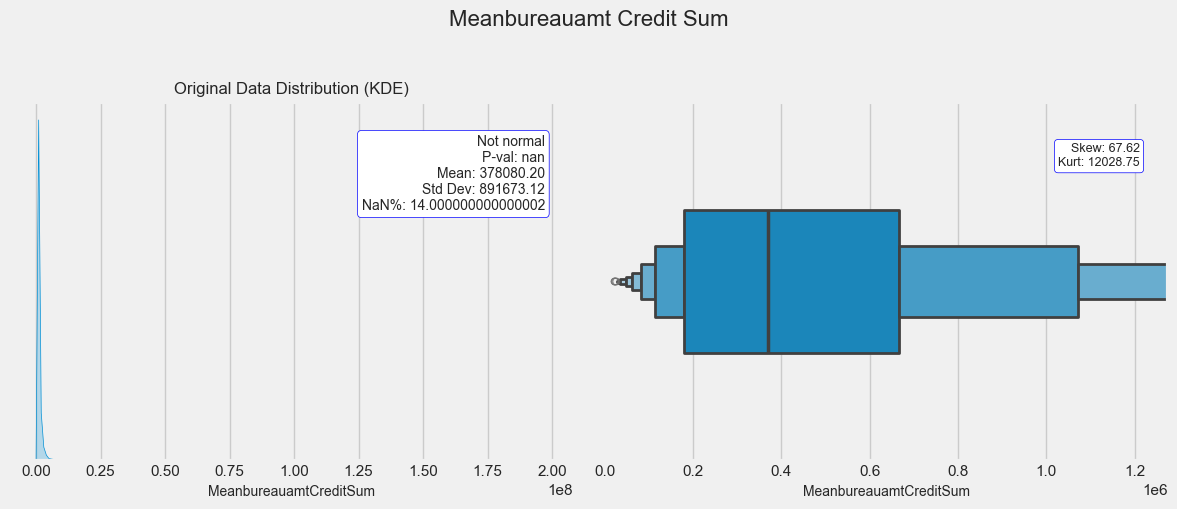

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


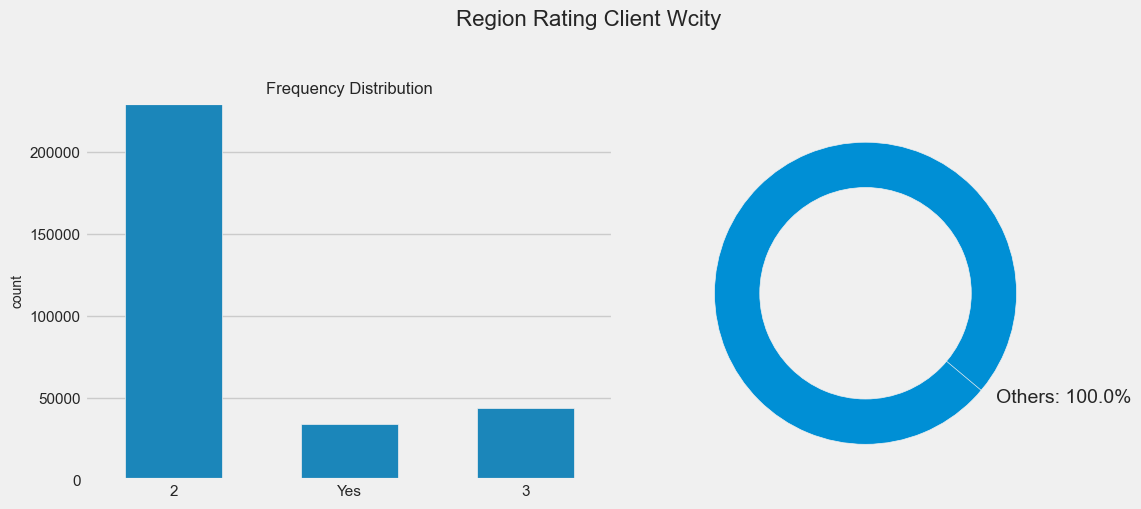

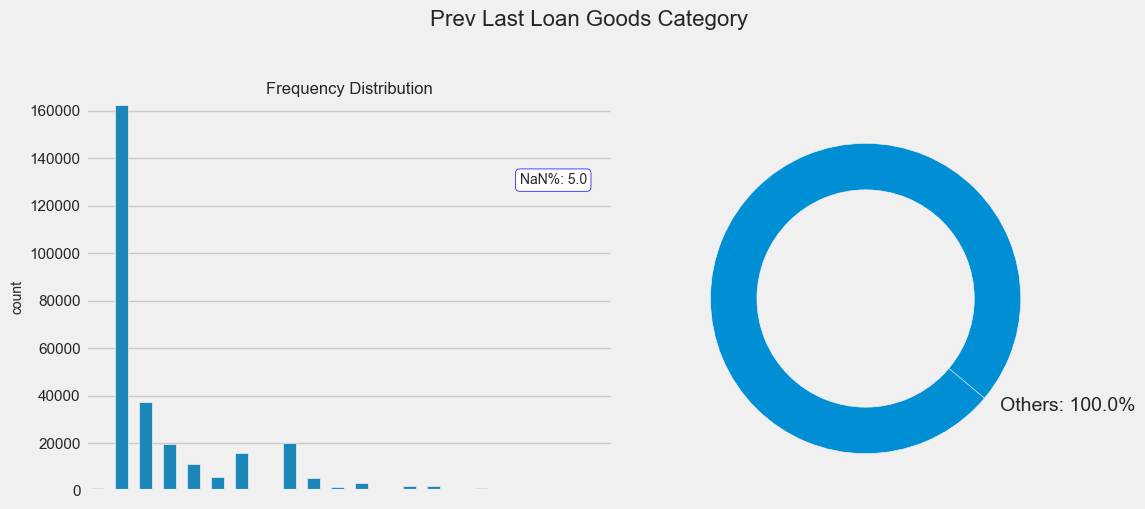

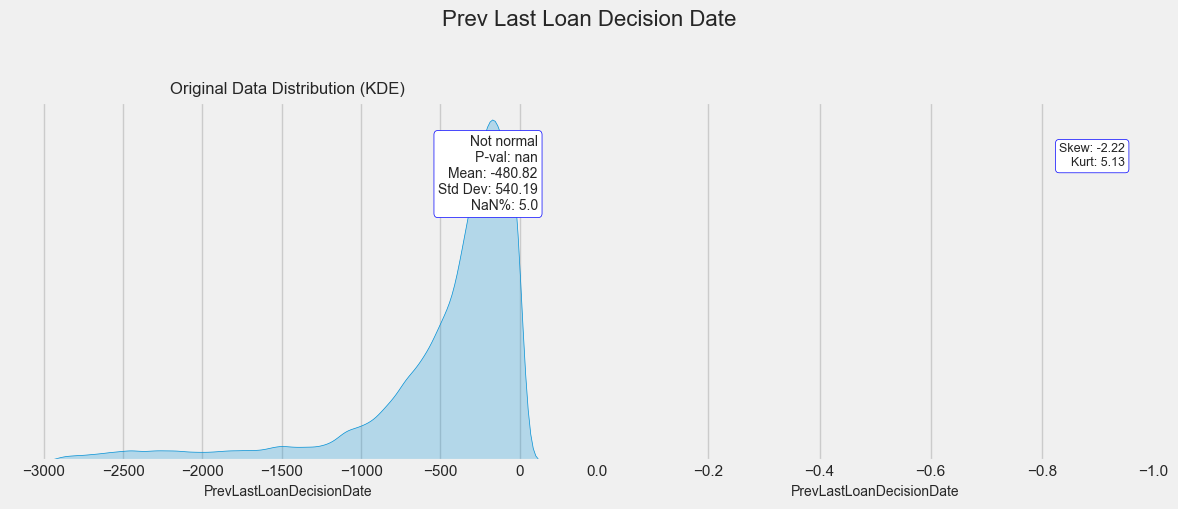

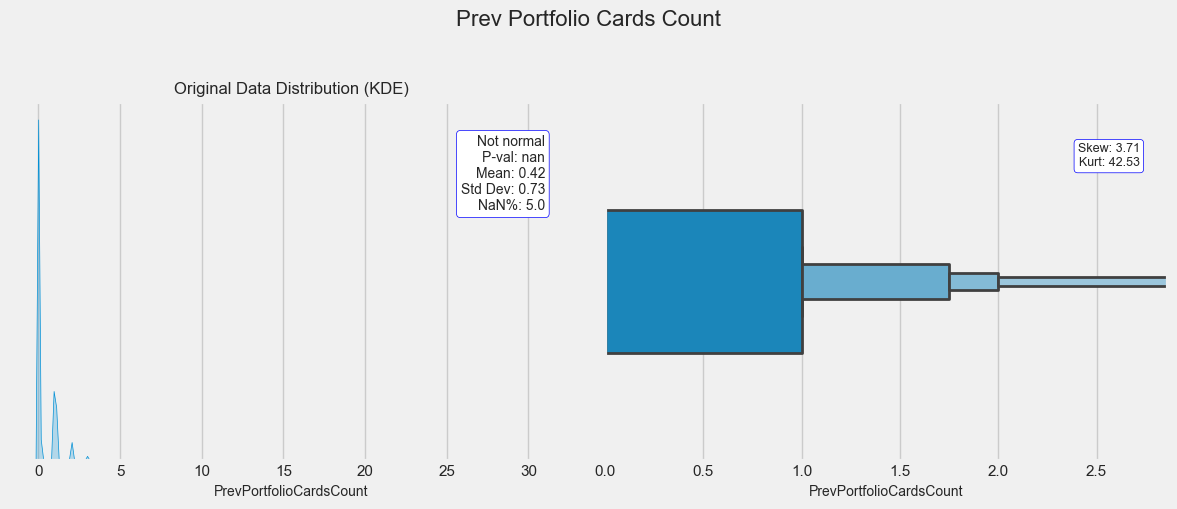

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


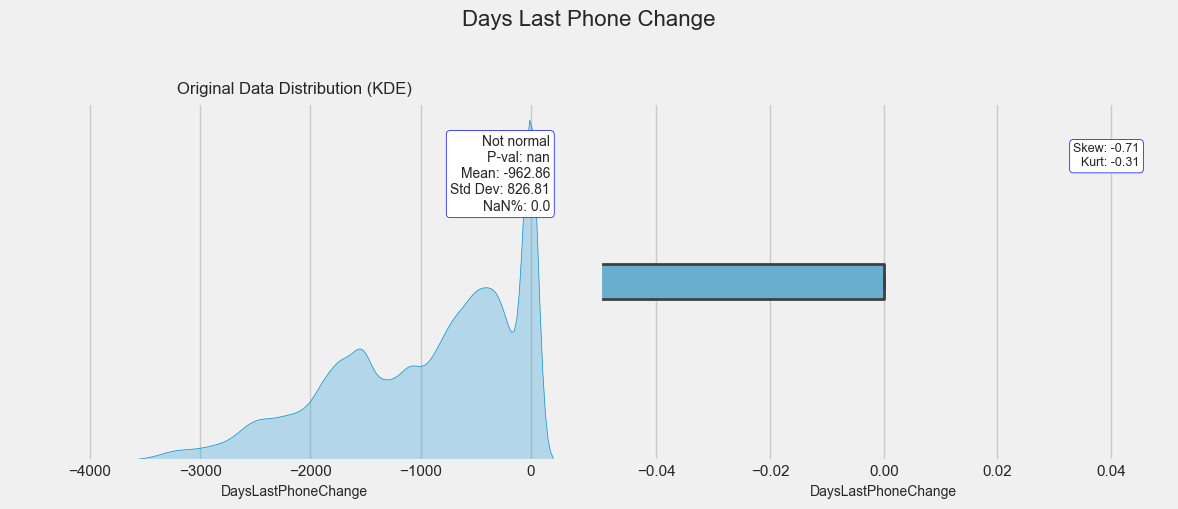

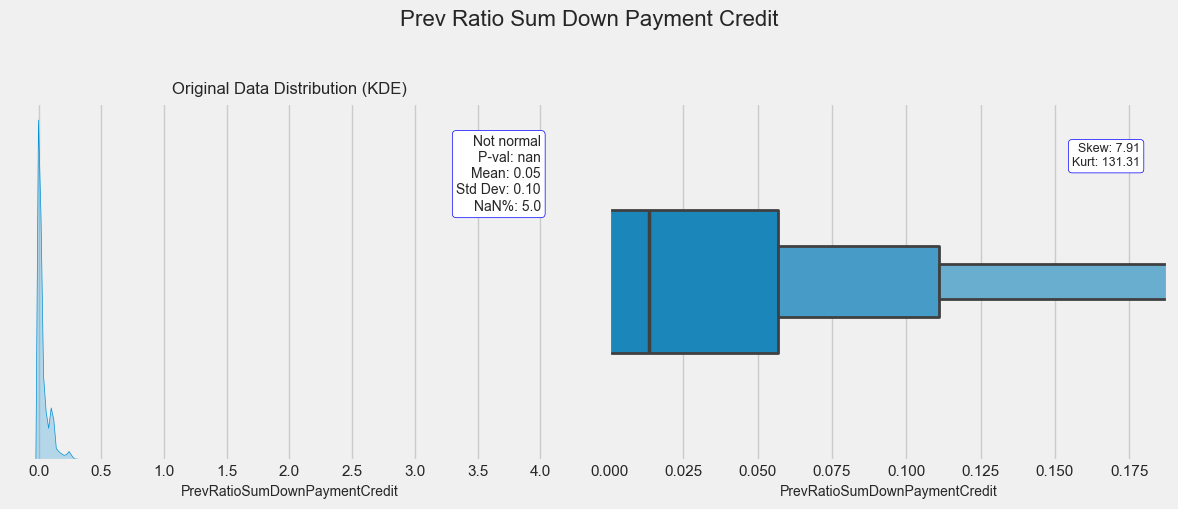

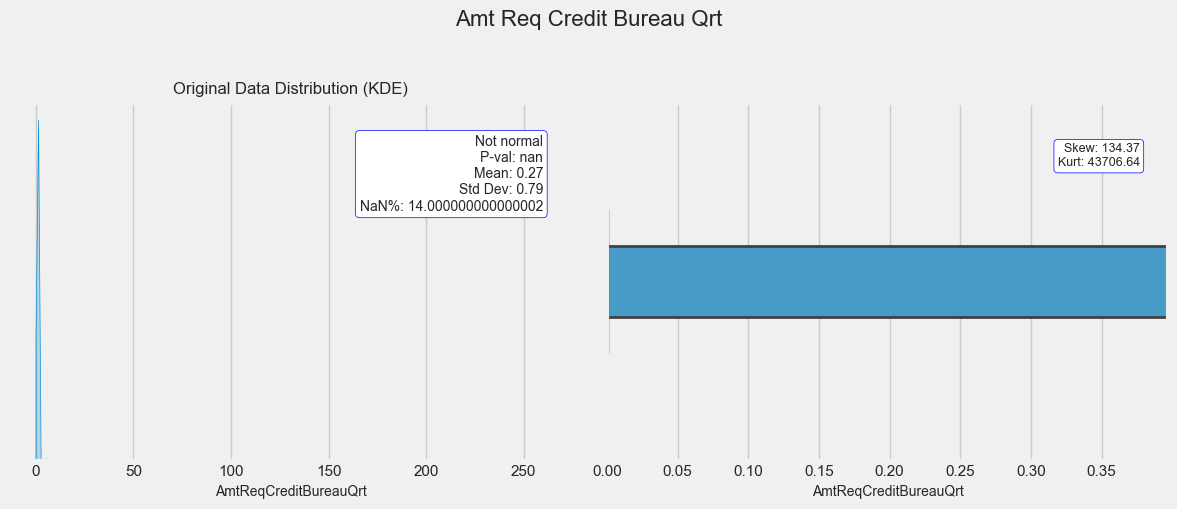

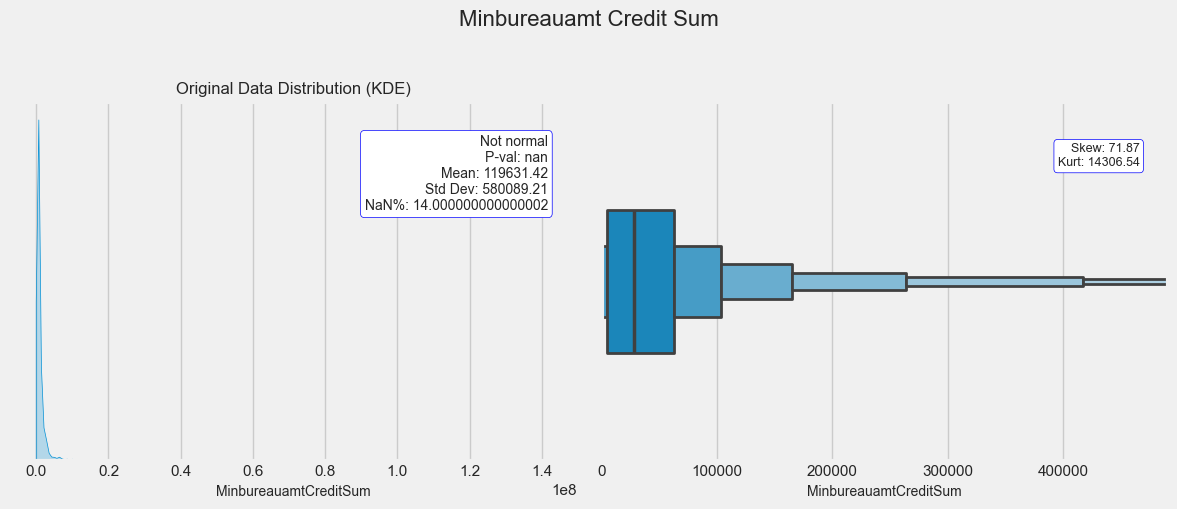

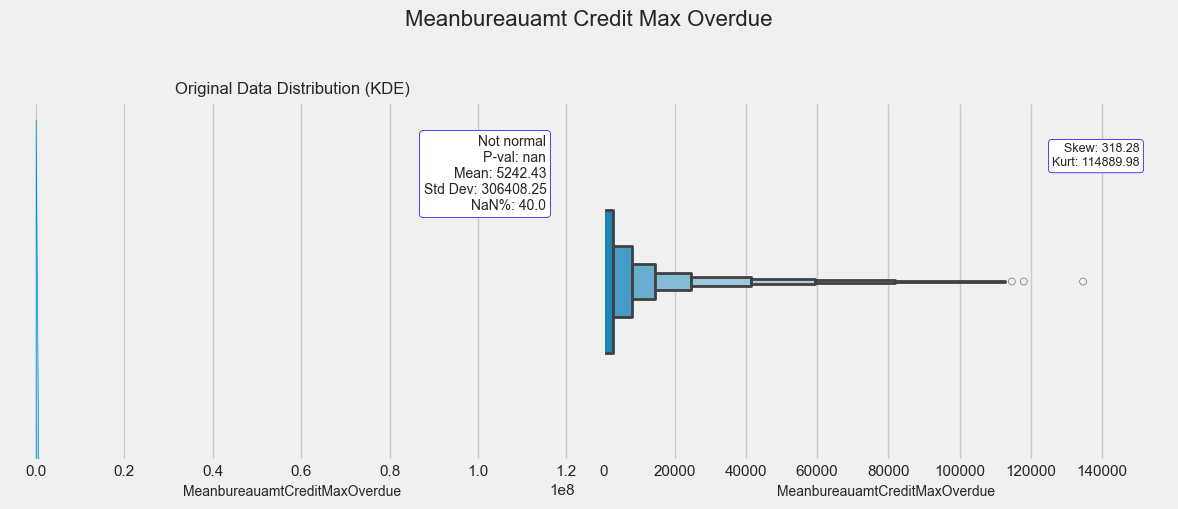

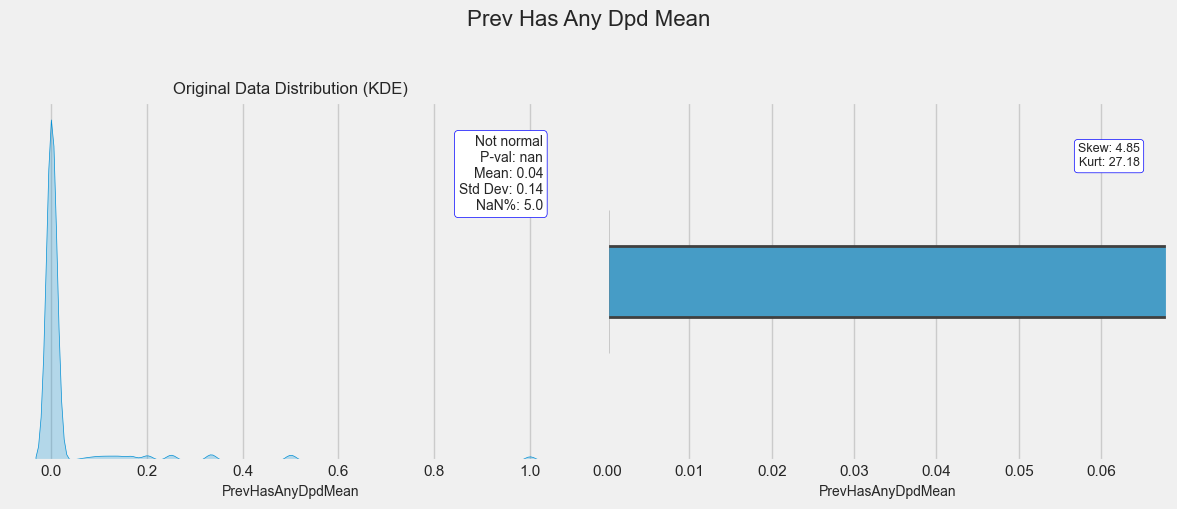

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


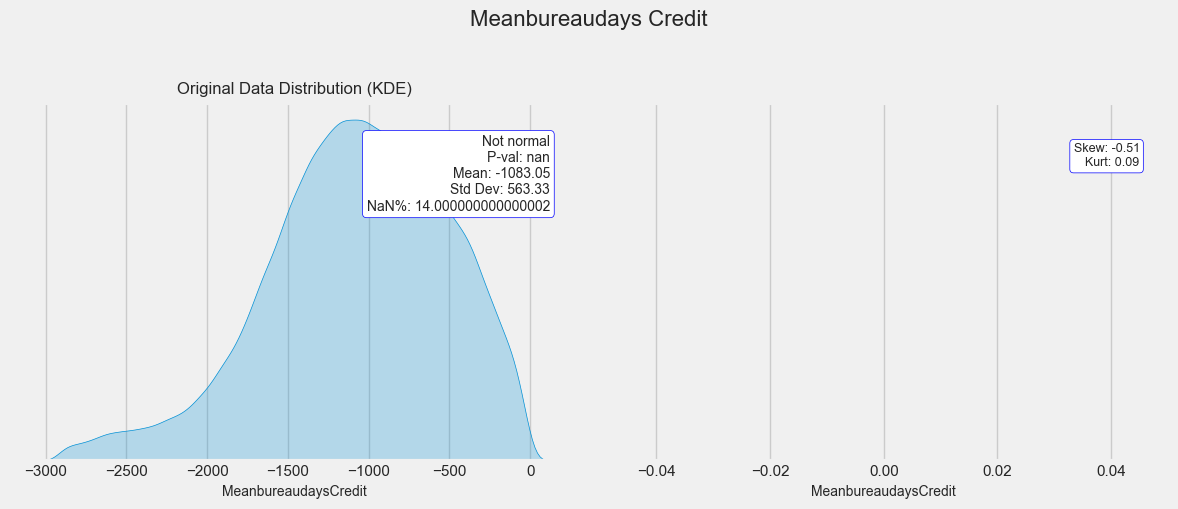

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


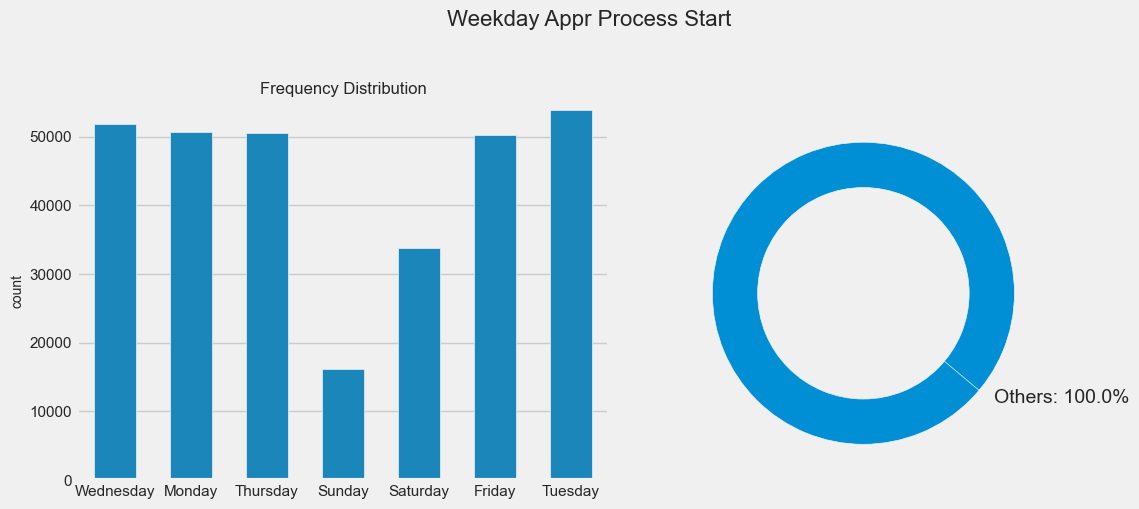

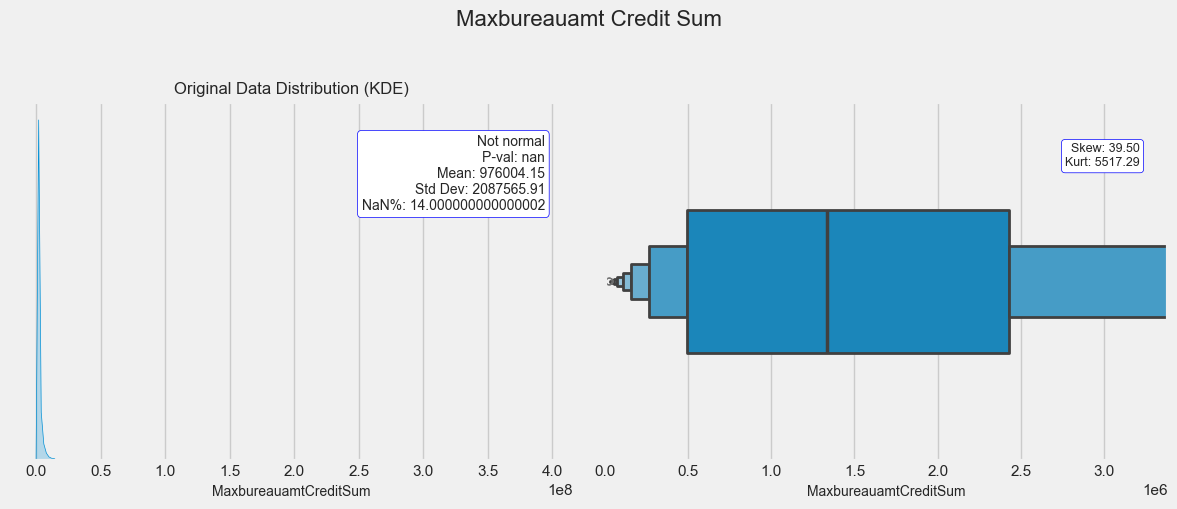

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


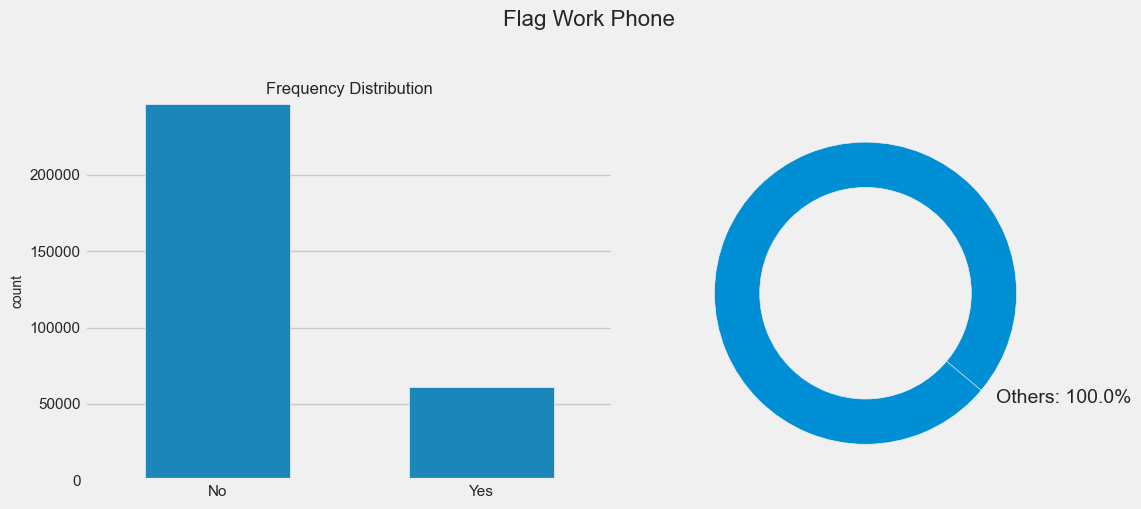

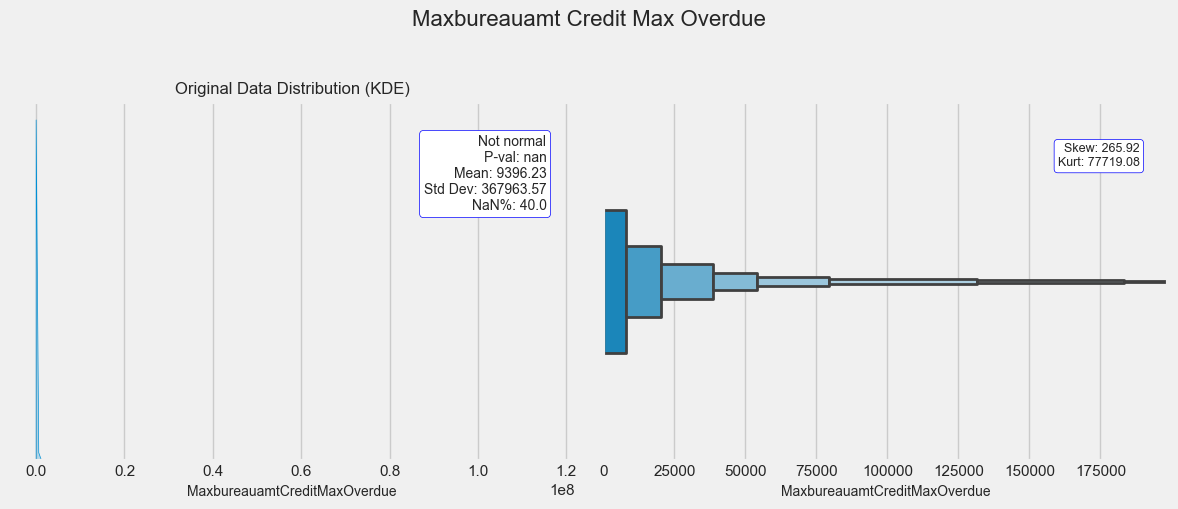

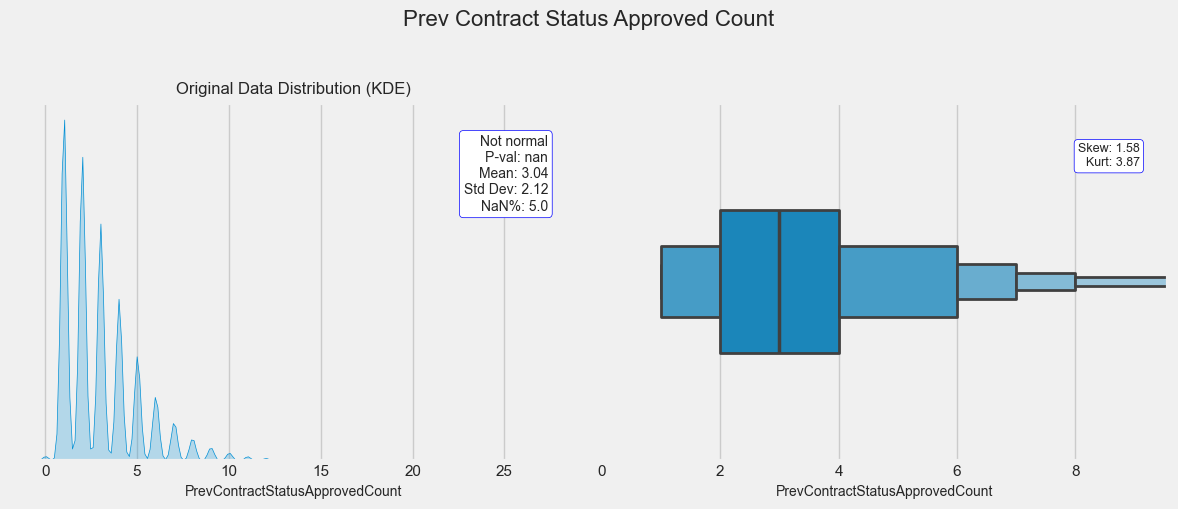

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


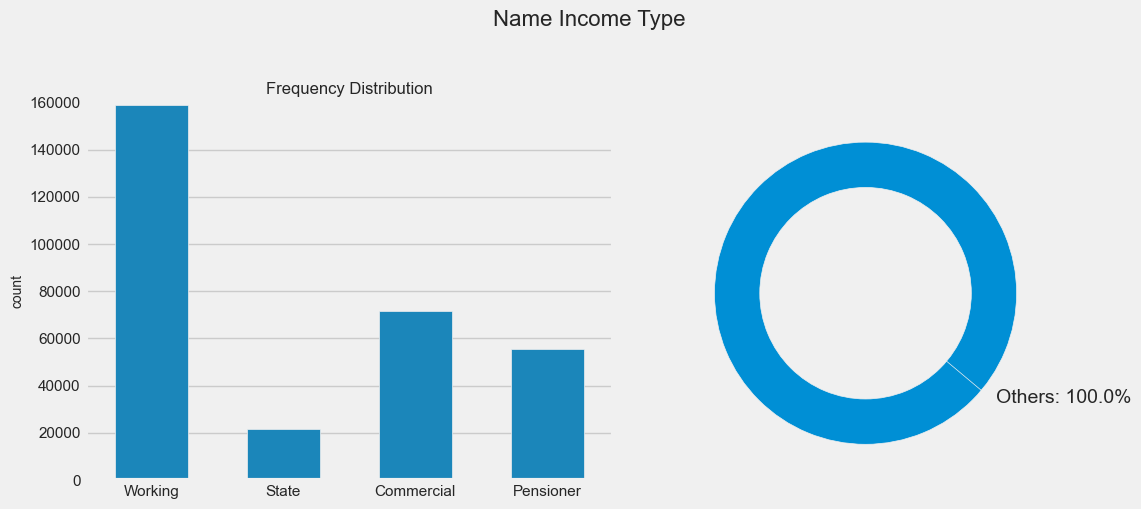

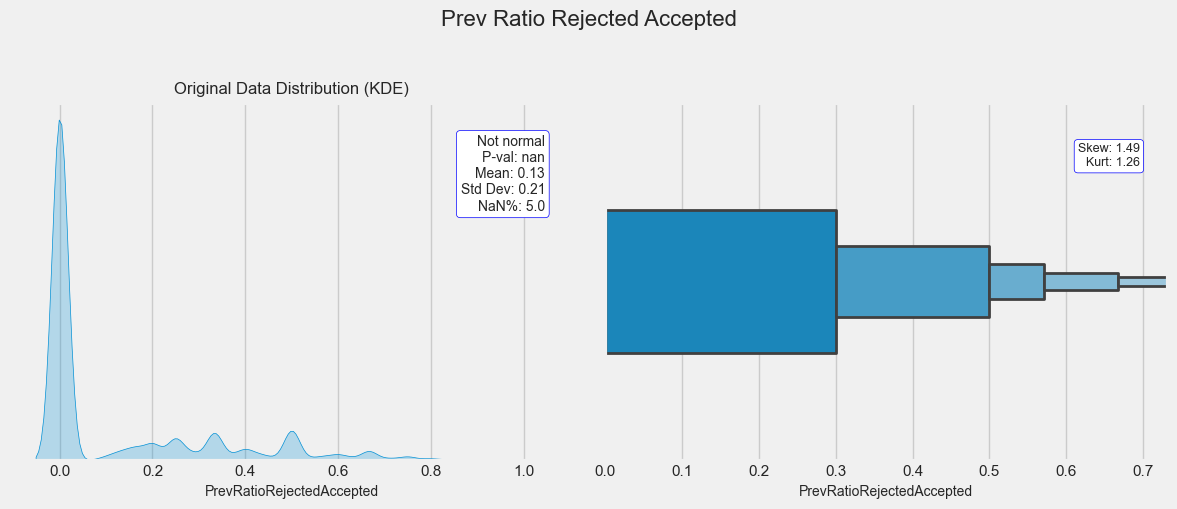

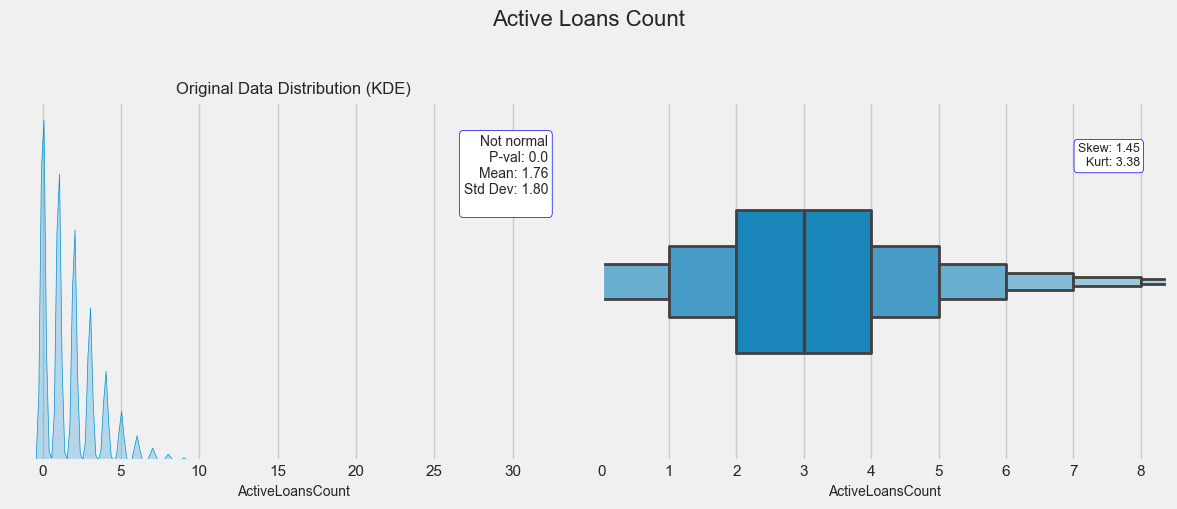

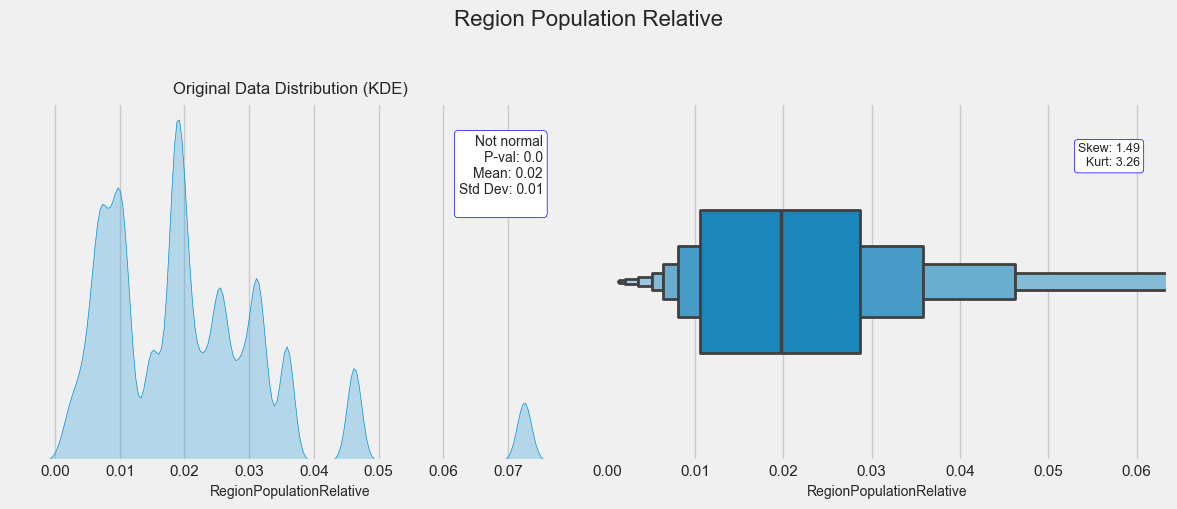

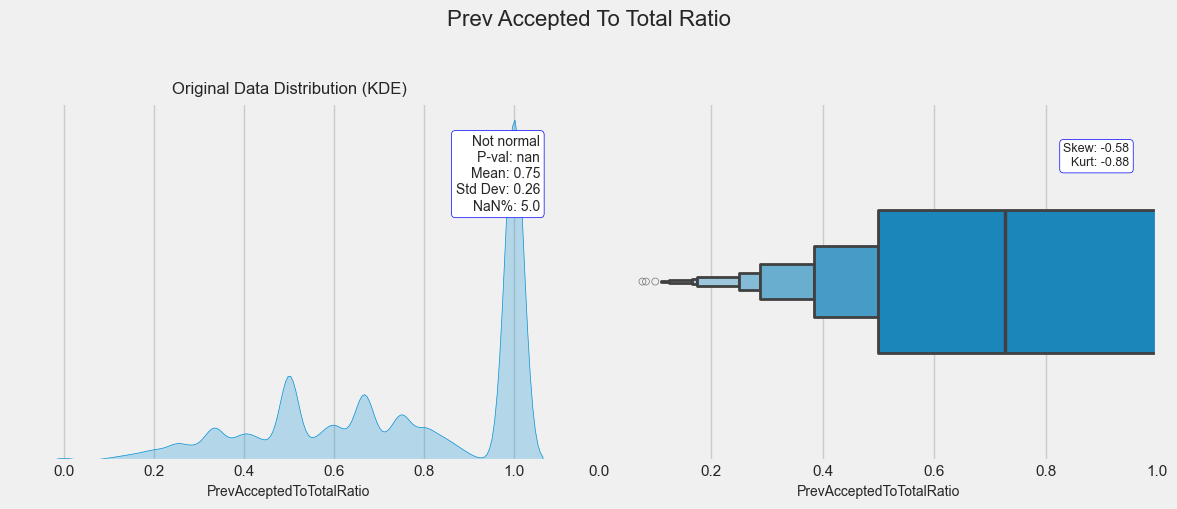

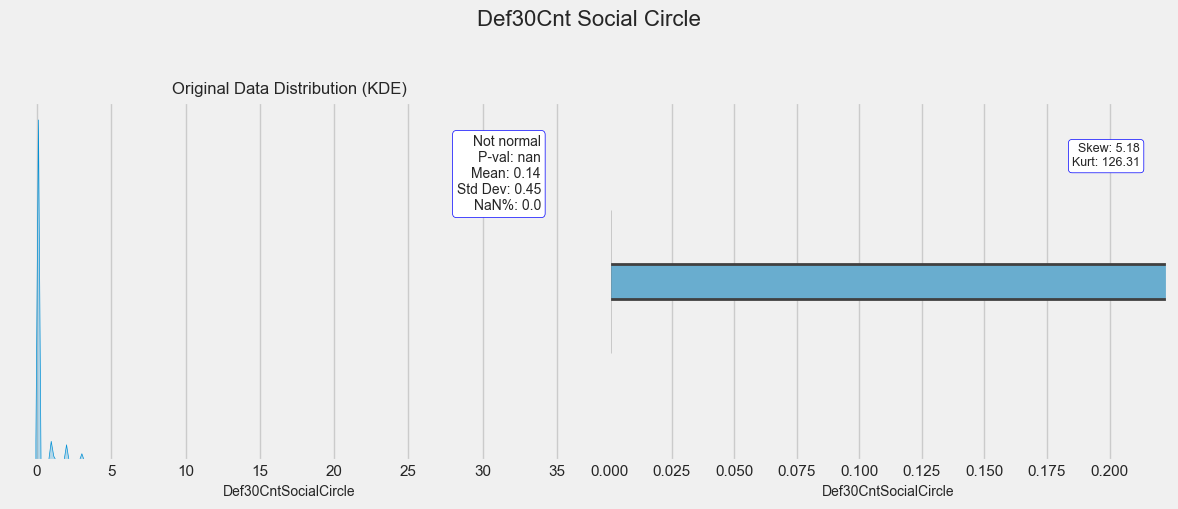

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


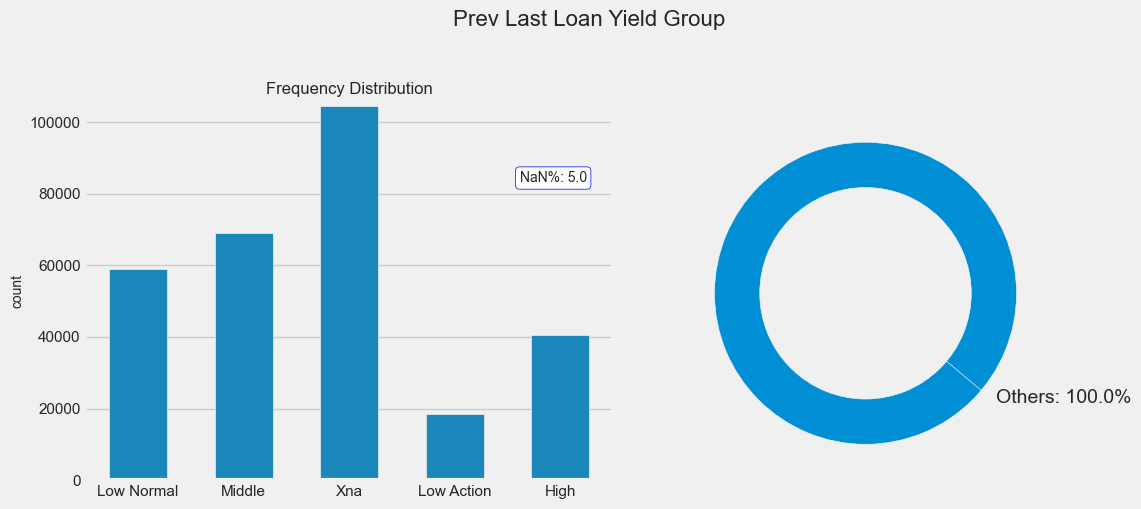

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


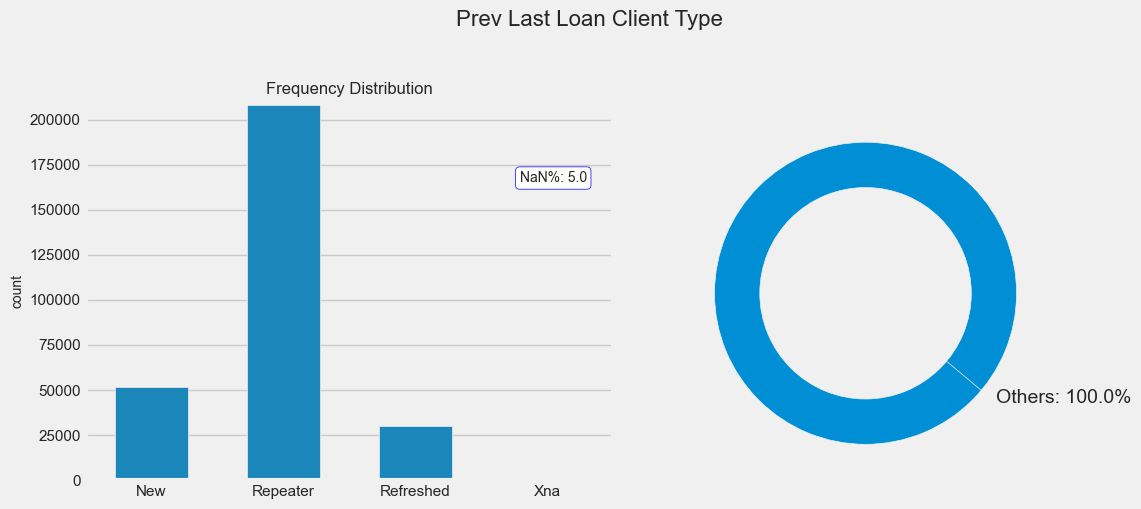

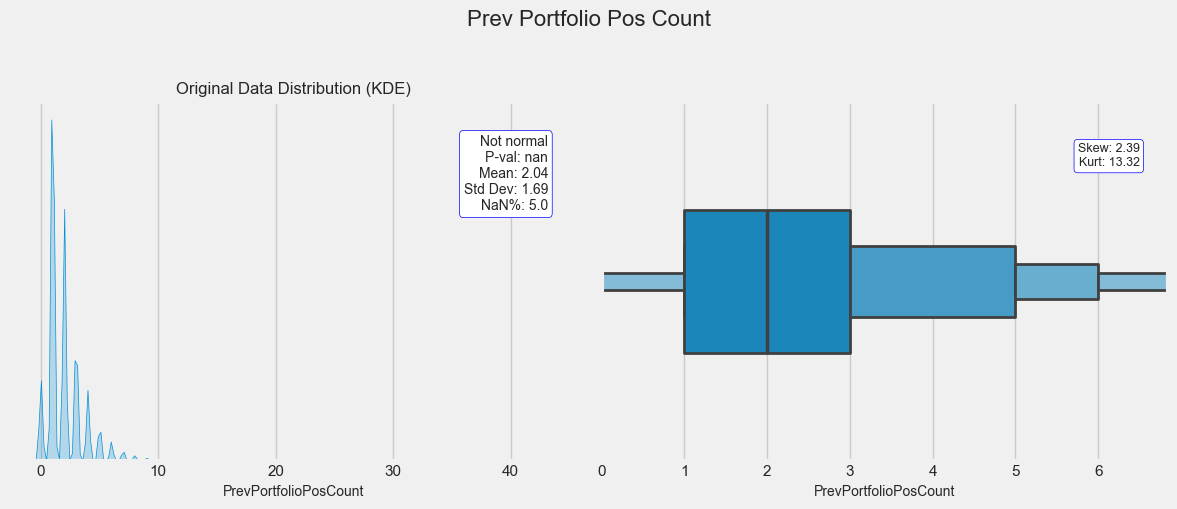

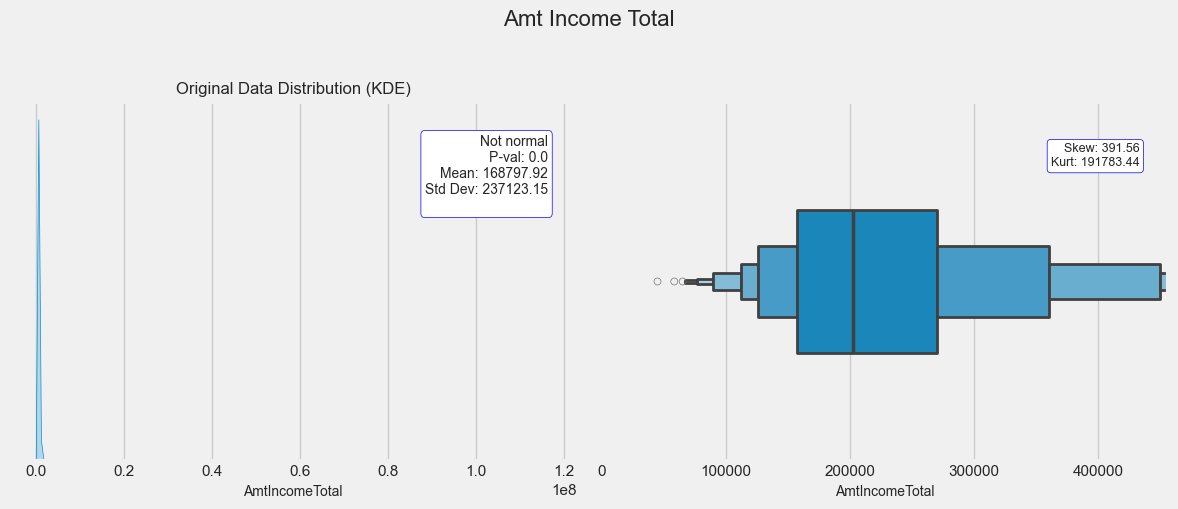

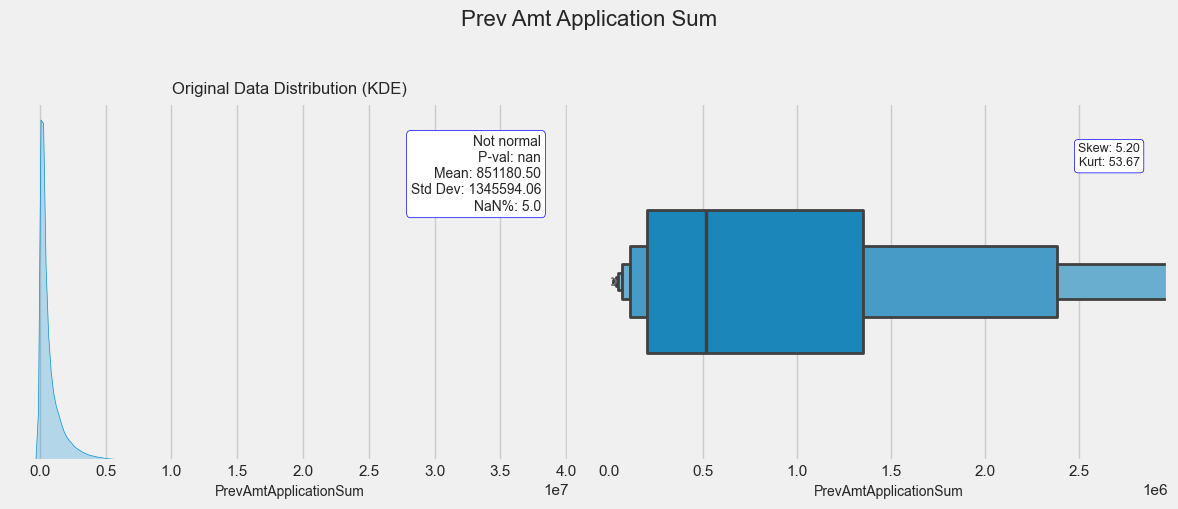

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


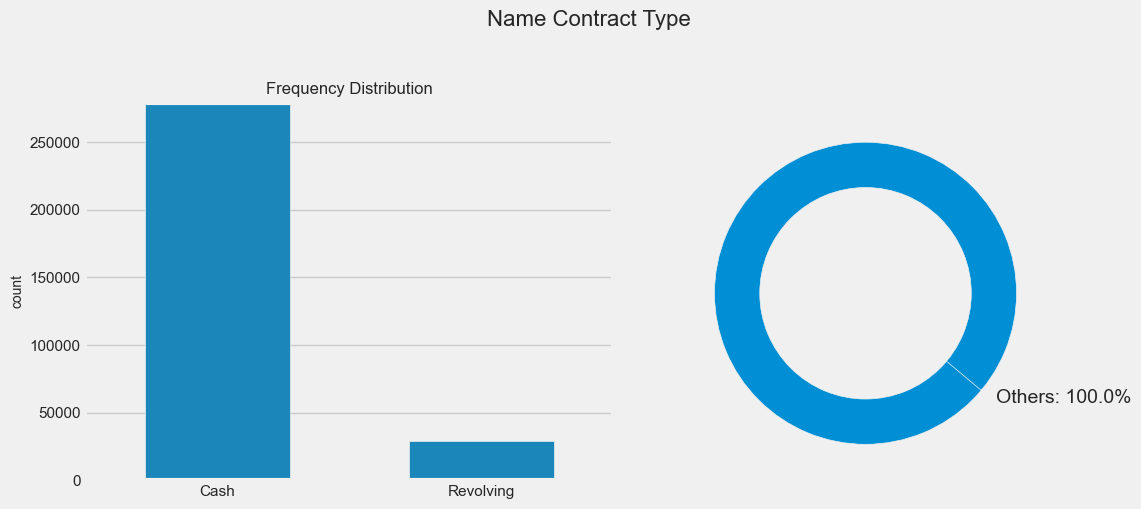

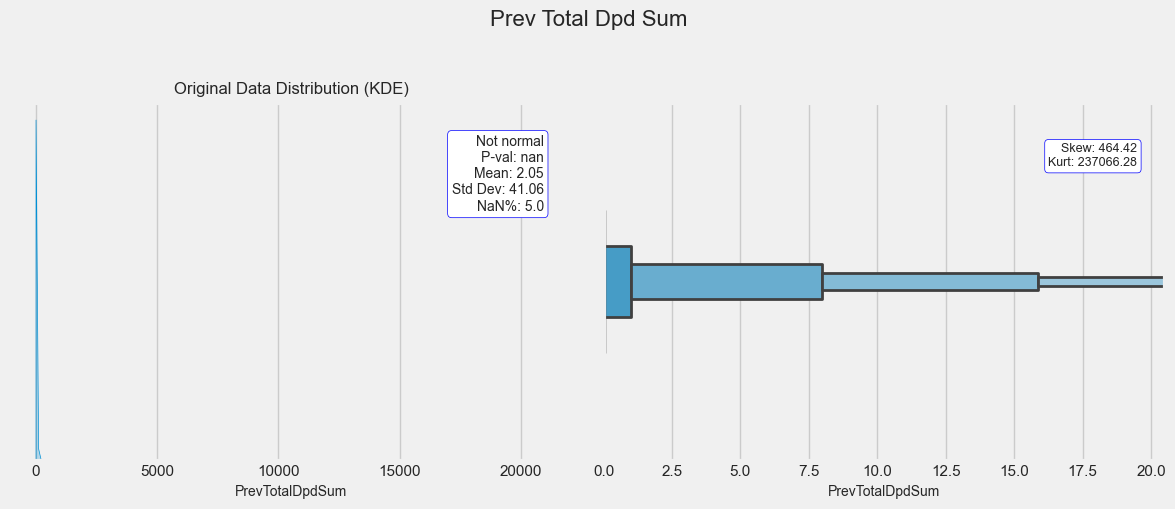

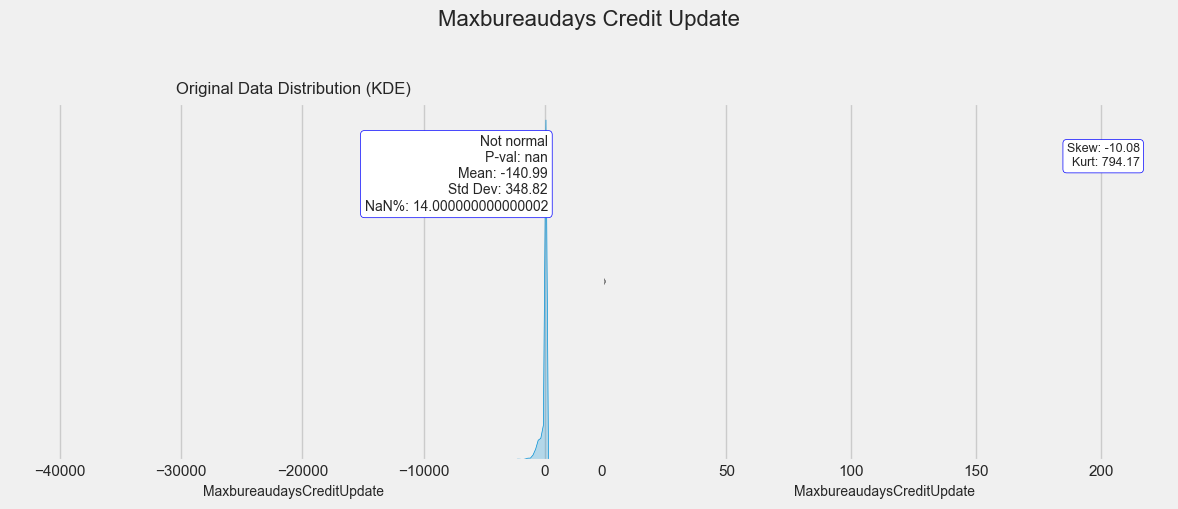

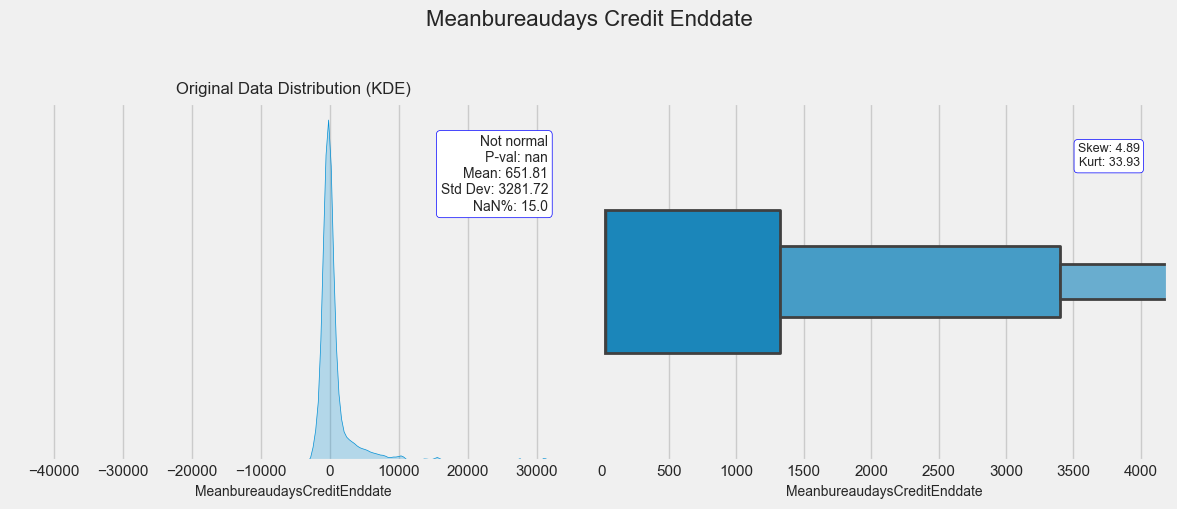

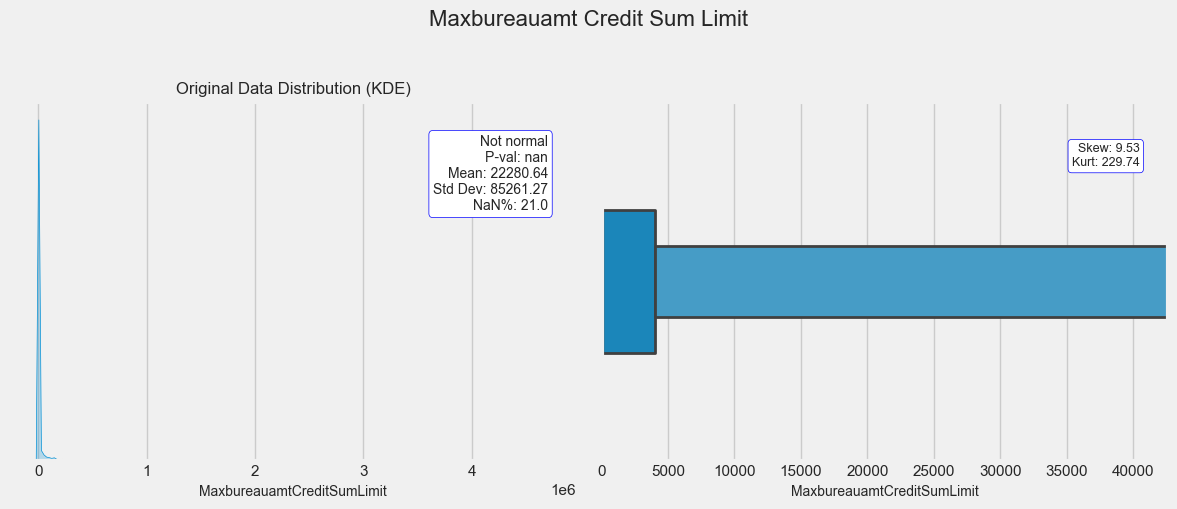

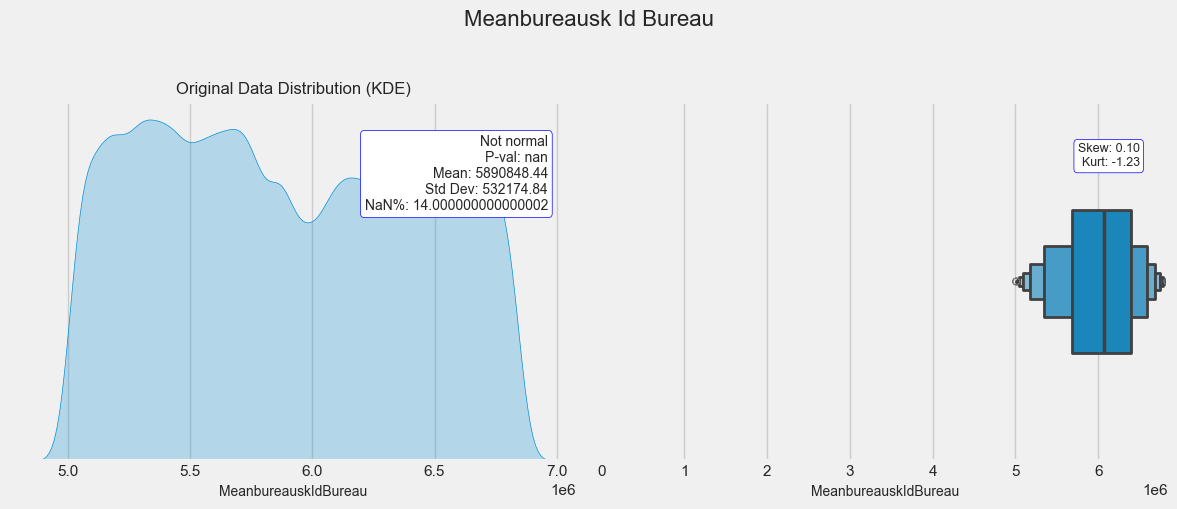

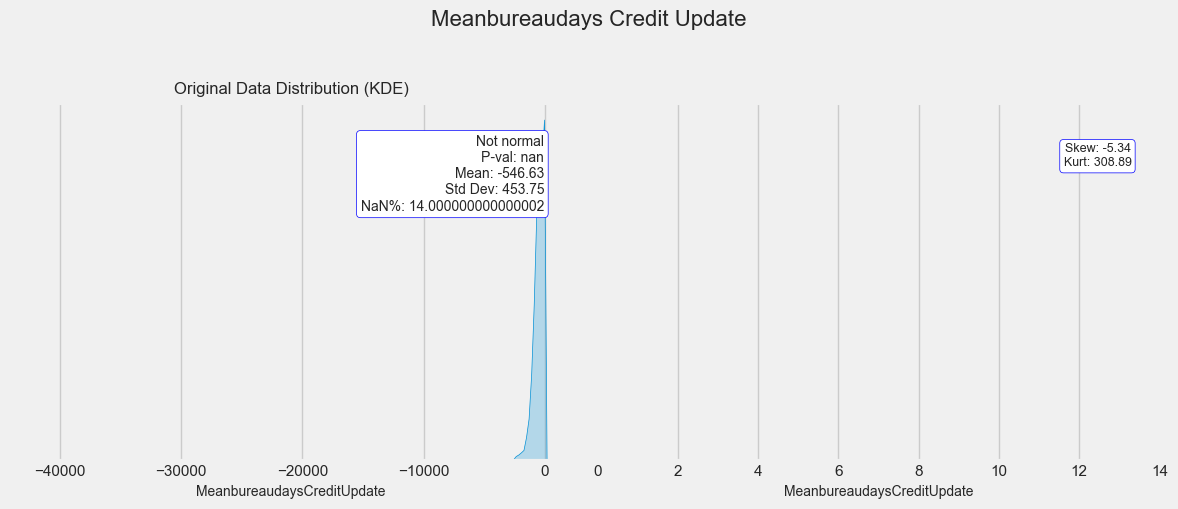

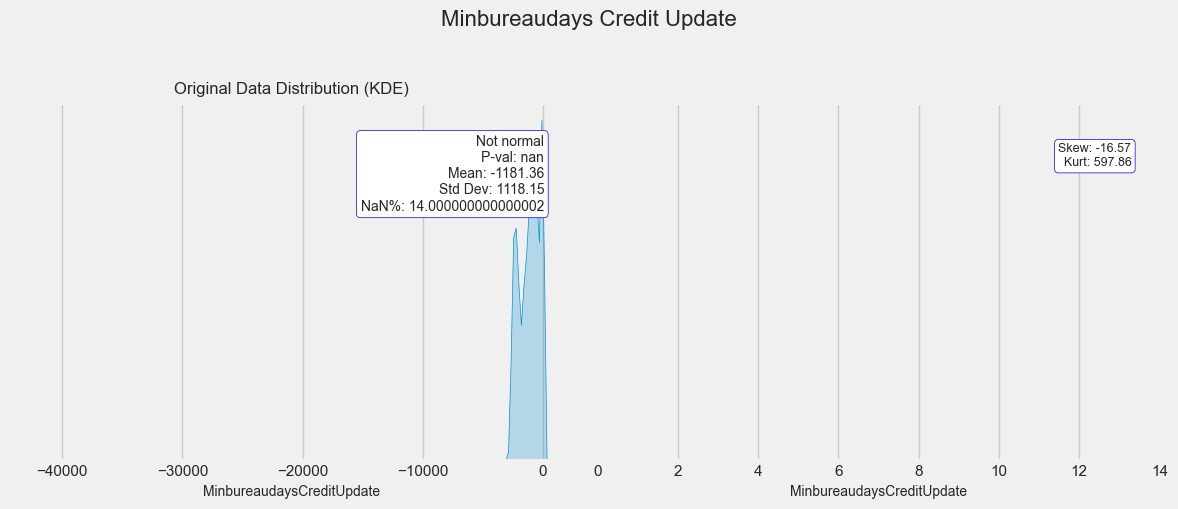

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


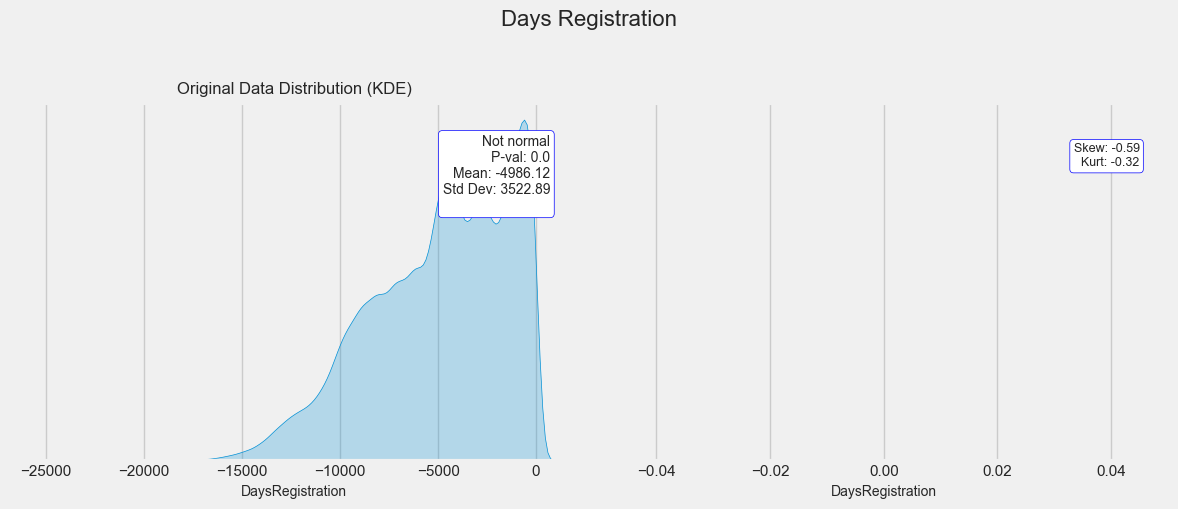

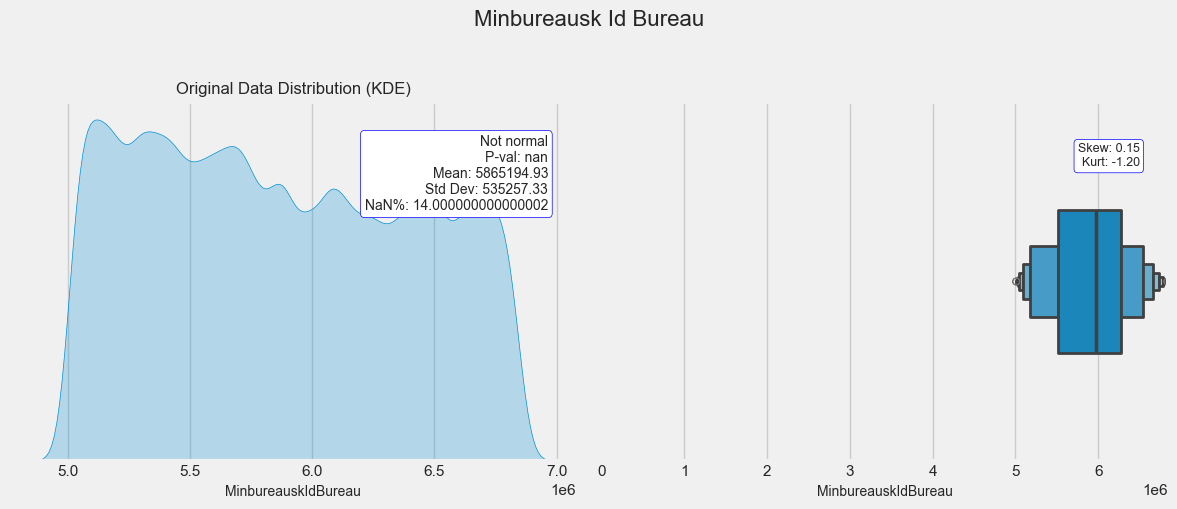

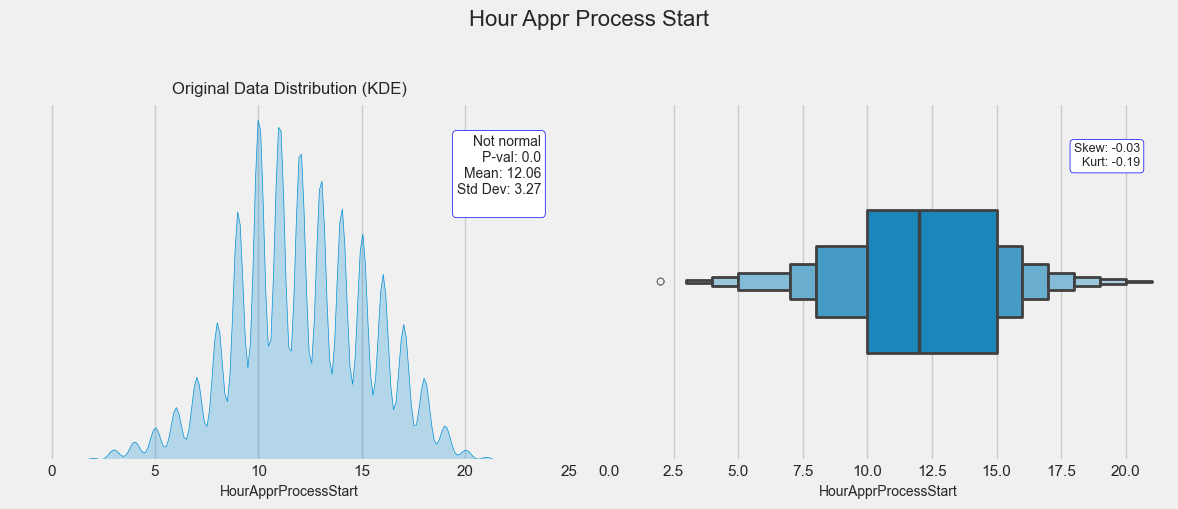

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


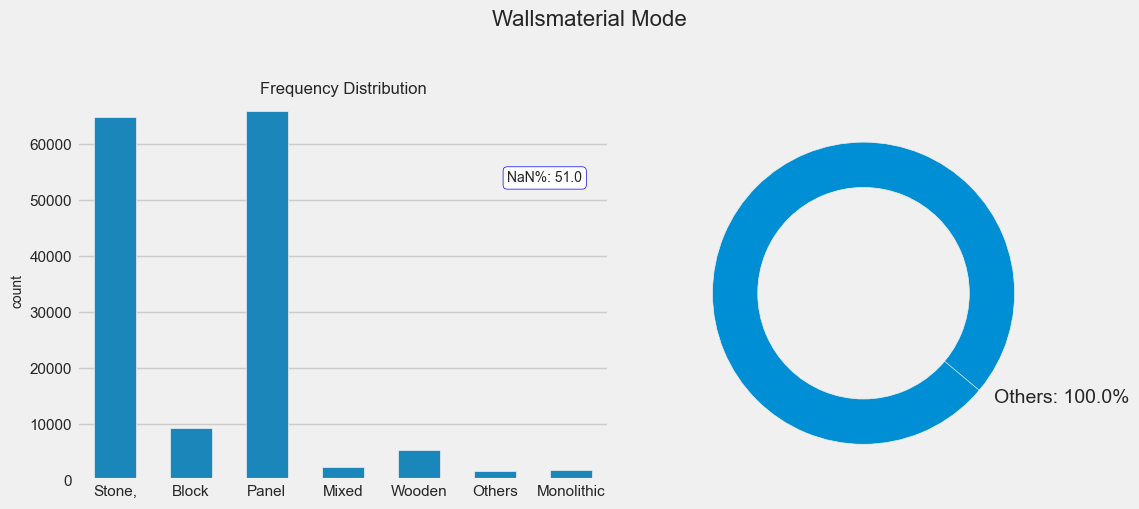

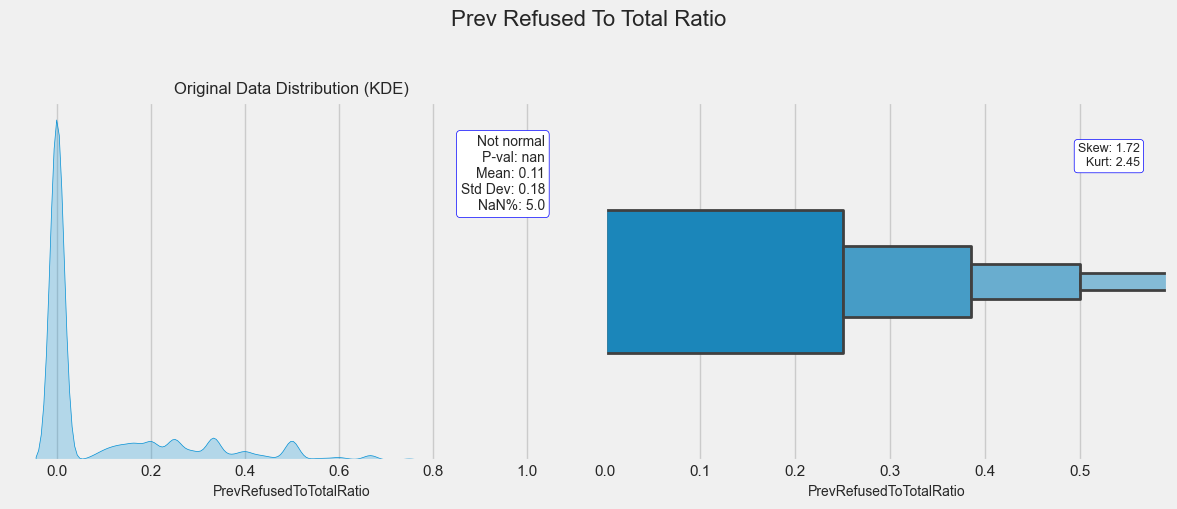

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


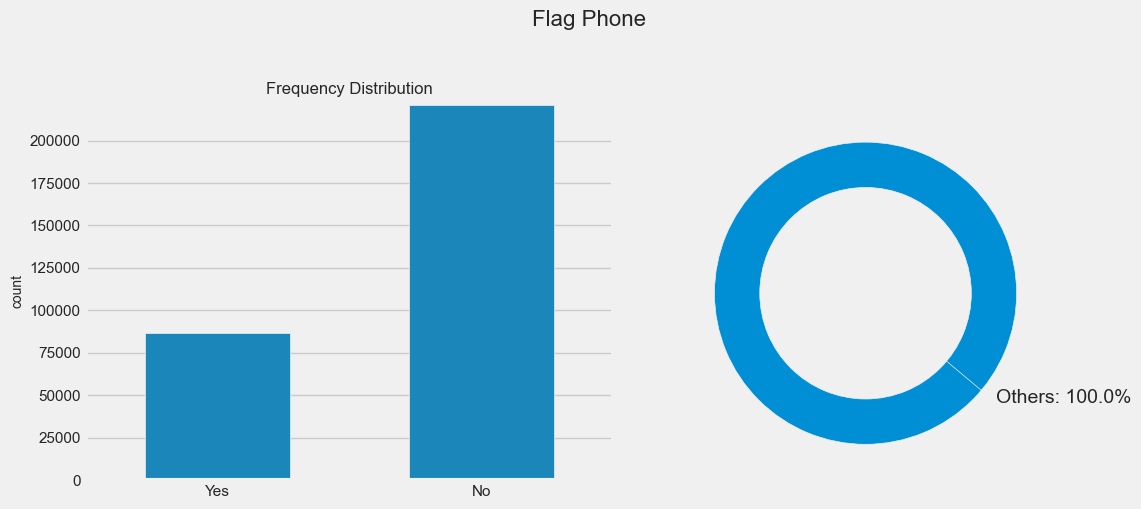

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


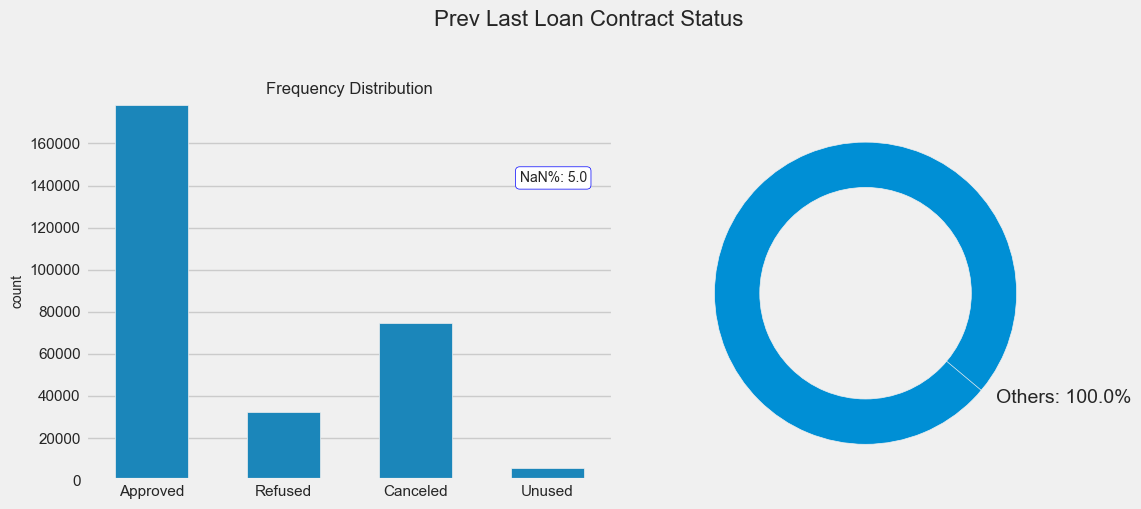

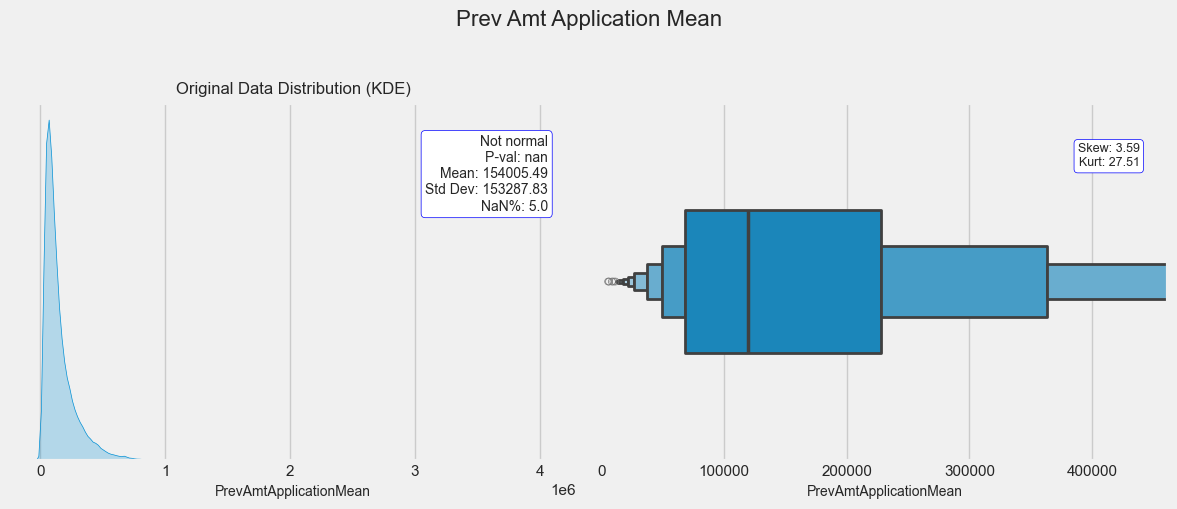

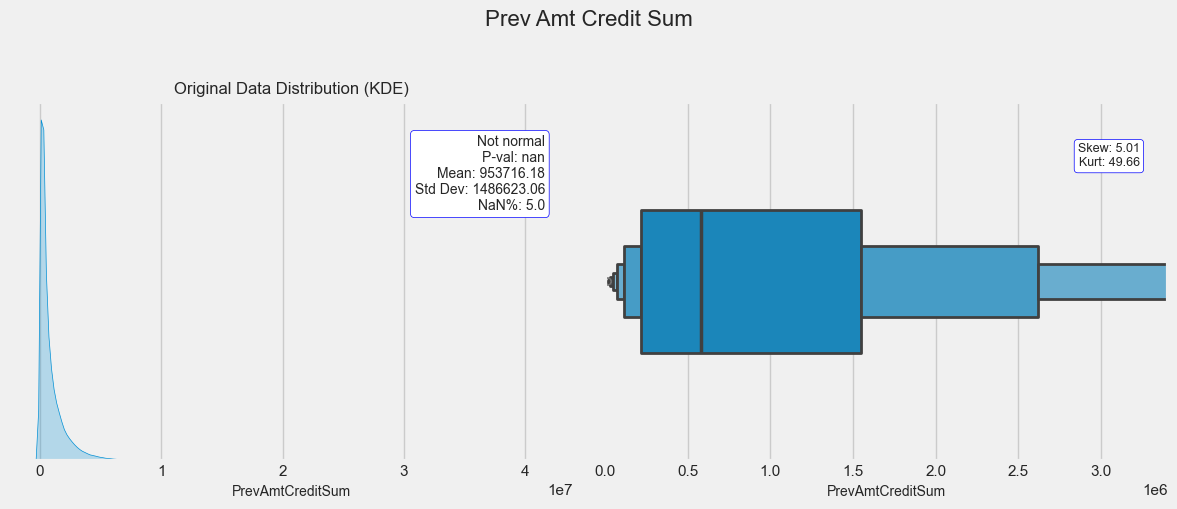

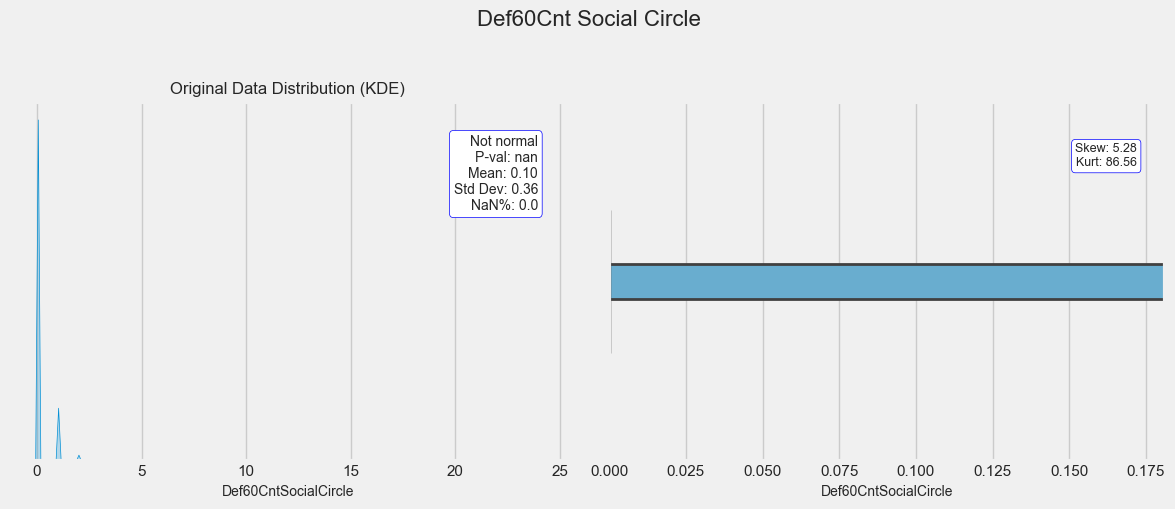

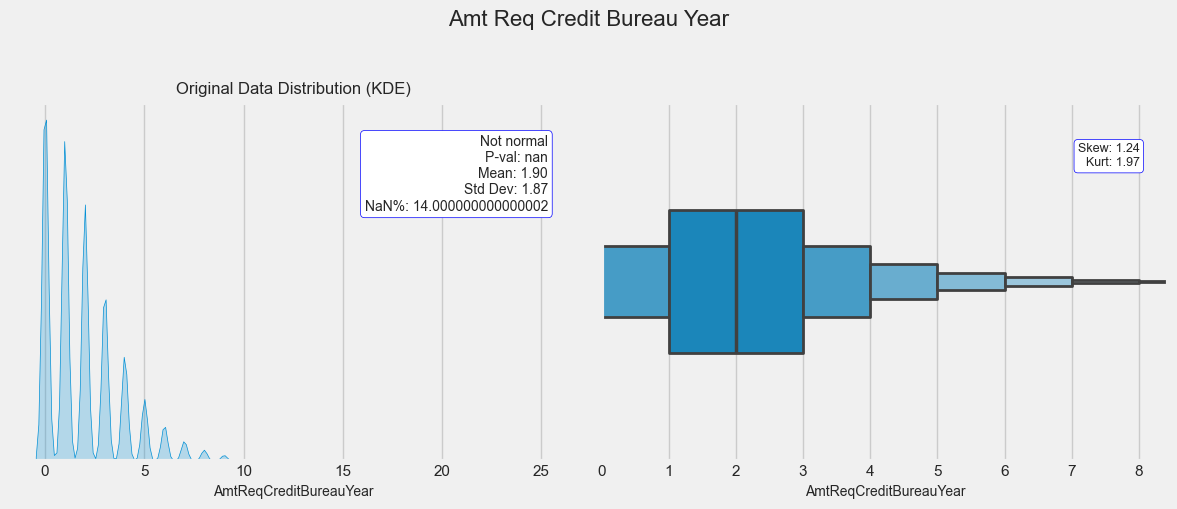

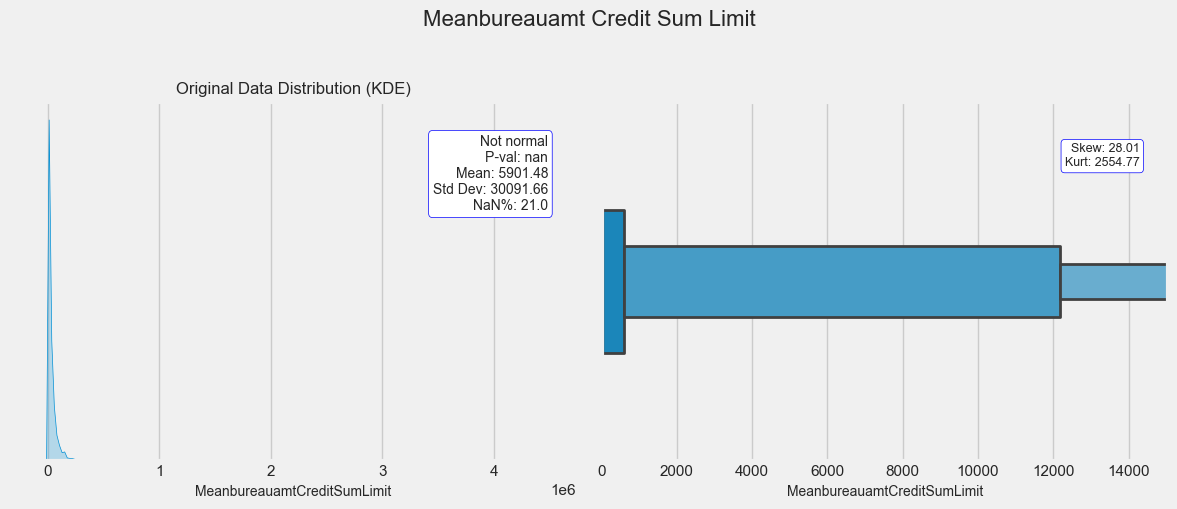

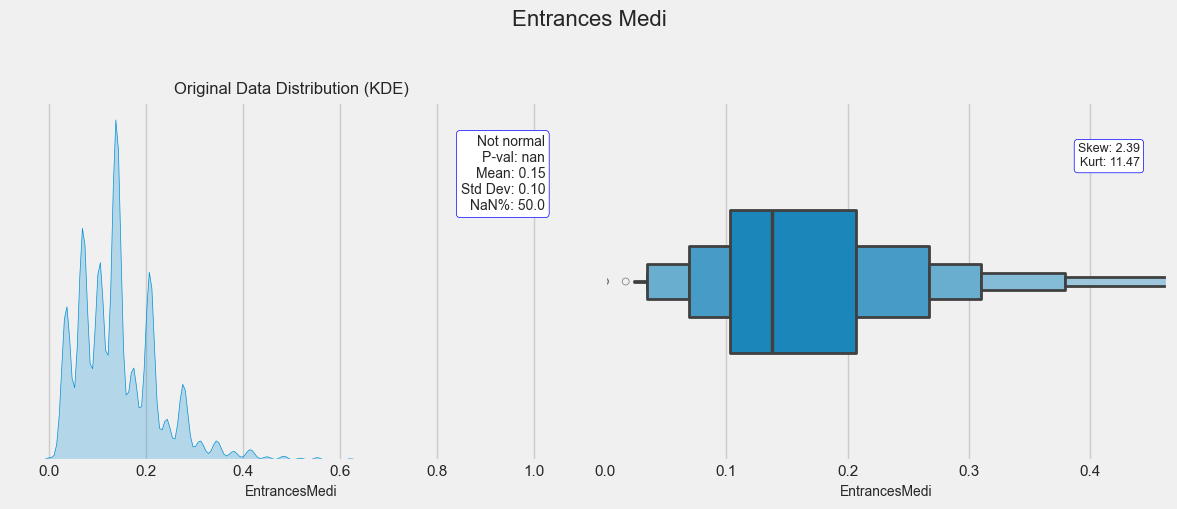

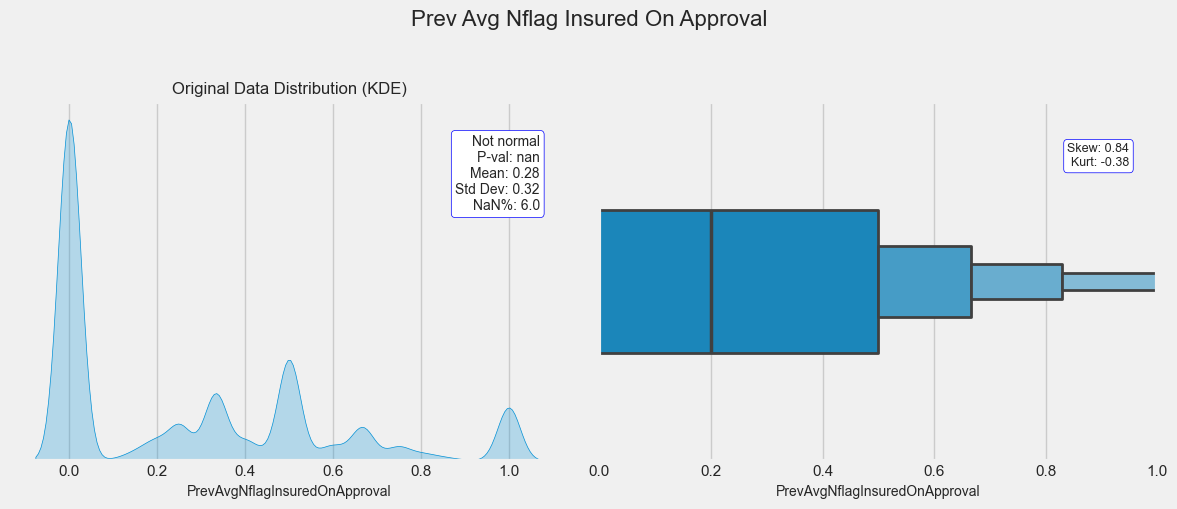

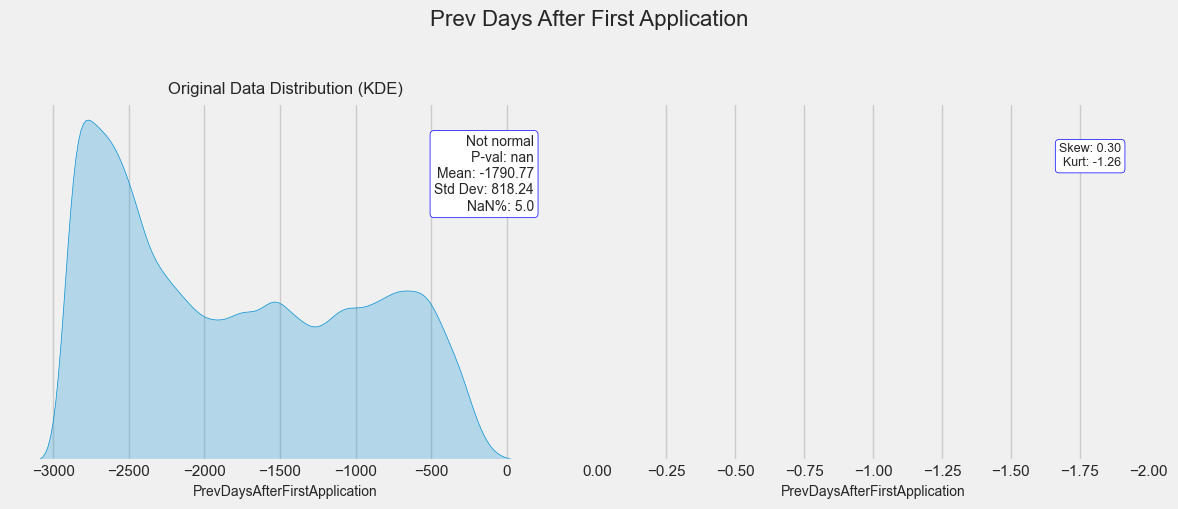

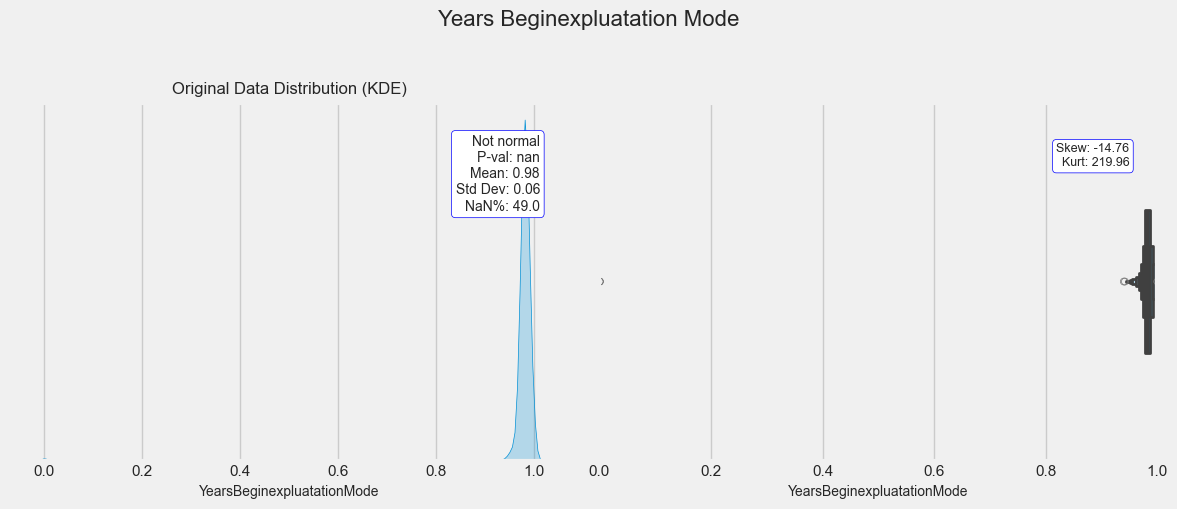

V:\projects\ppuodz-ML.4.1\shared\graph.py:1096: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(tick_labels)


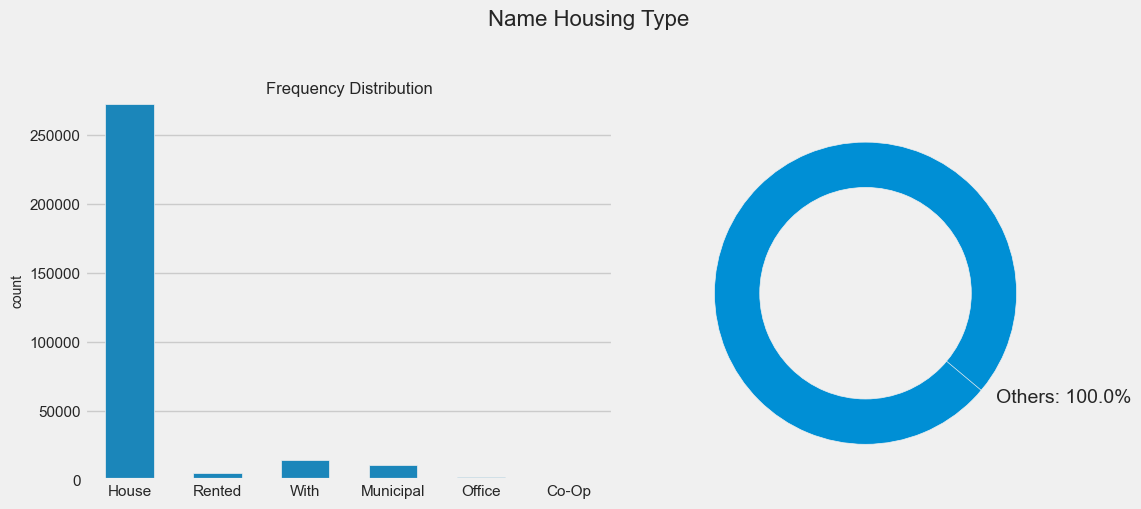

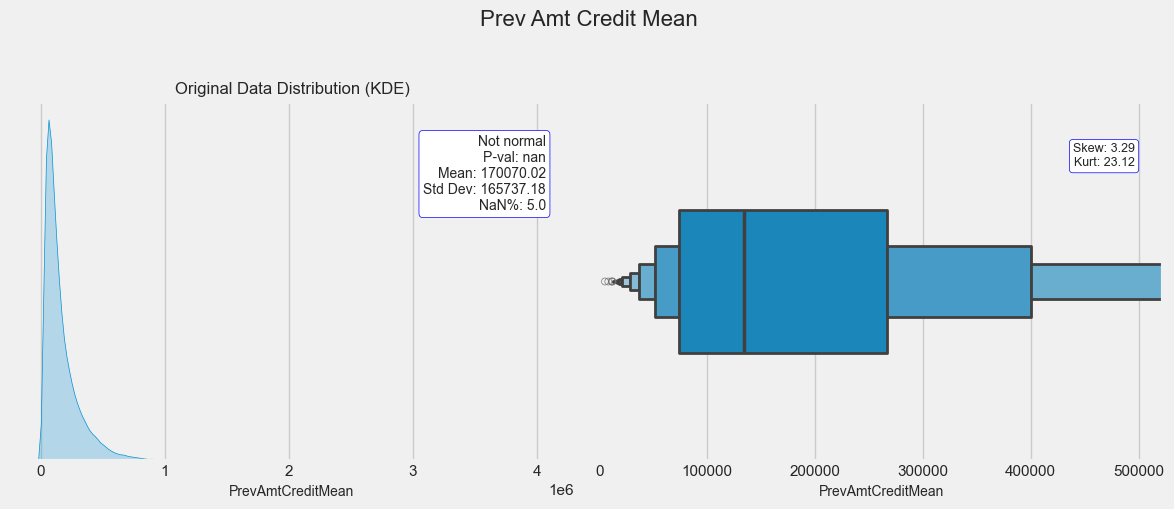

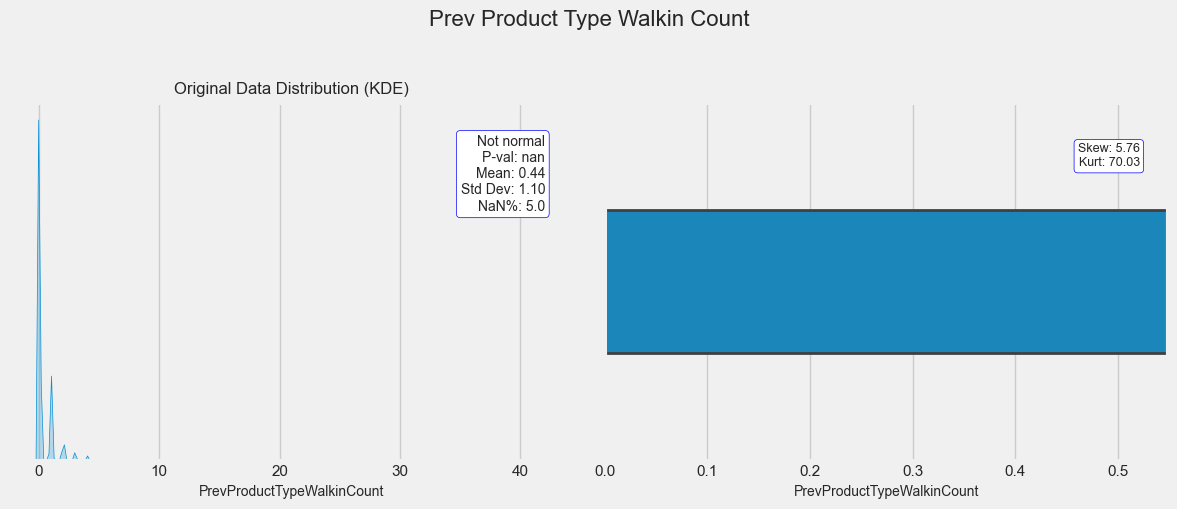

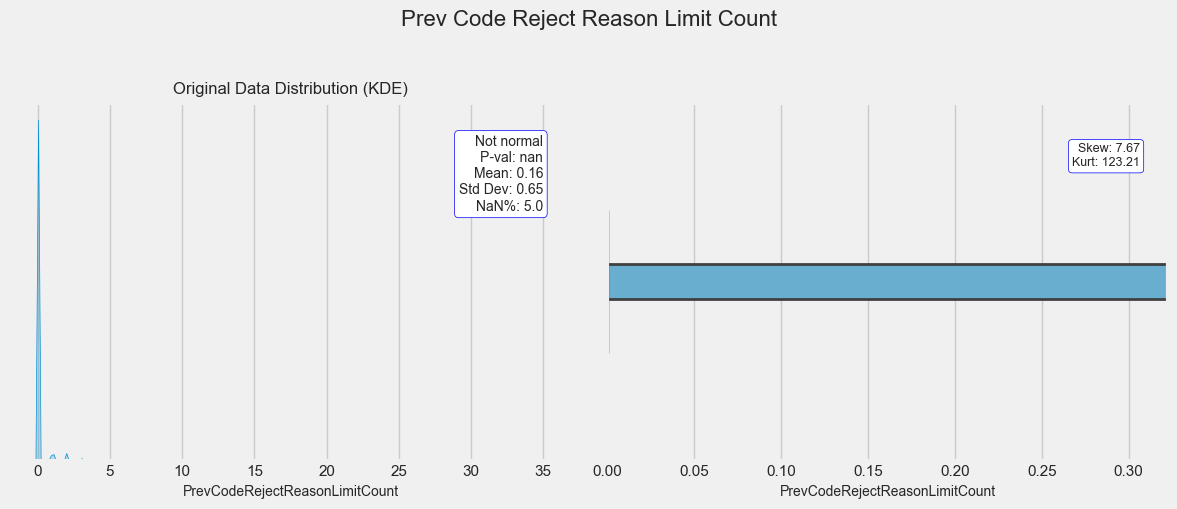

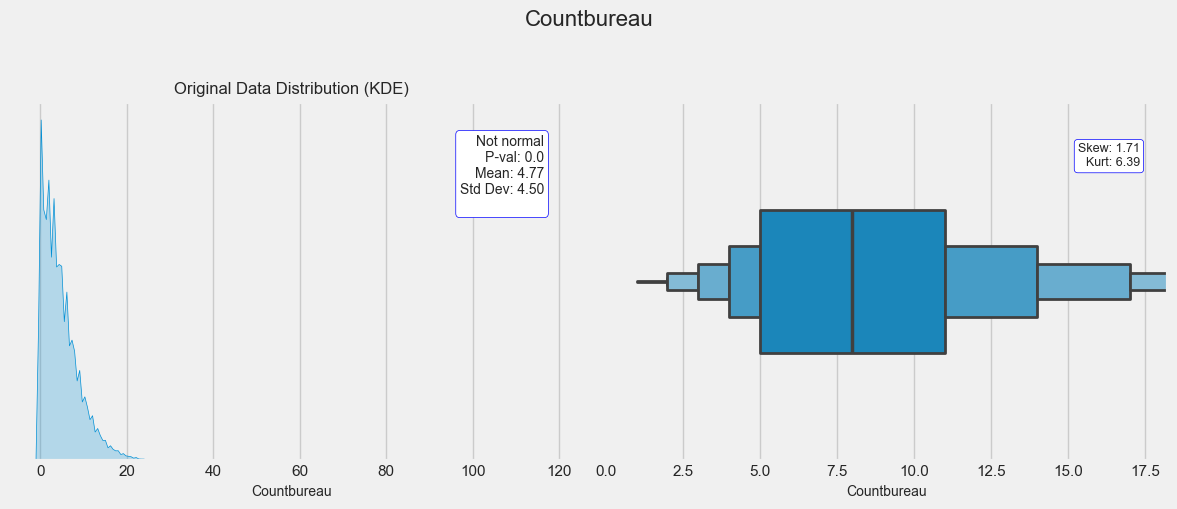

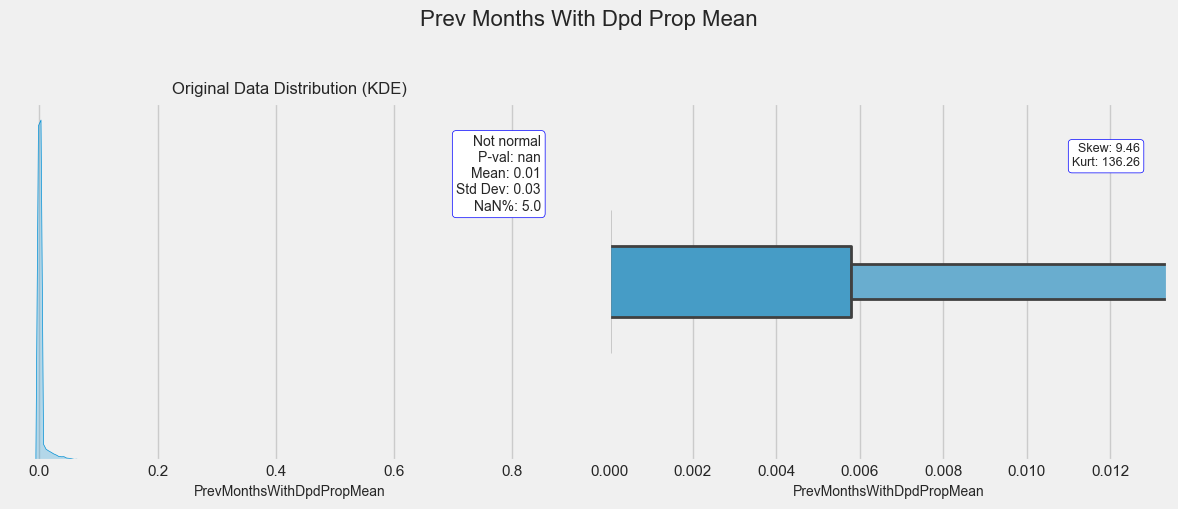

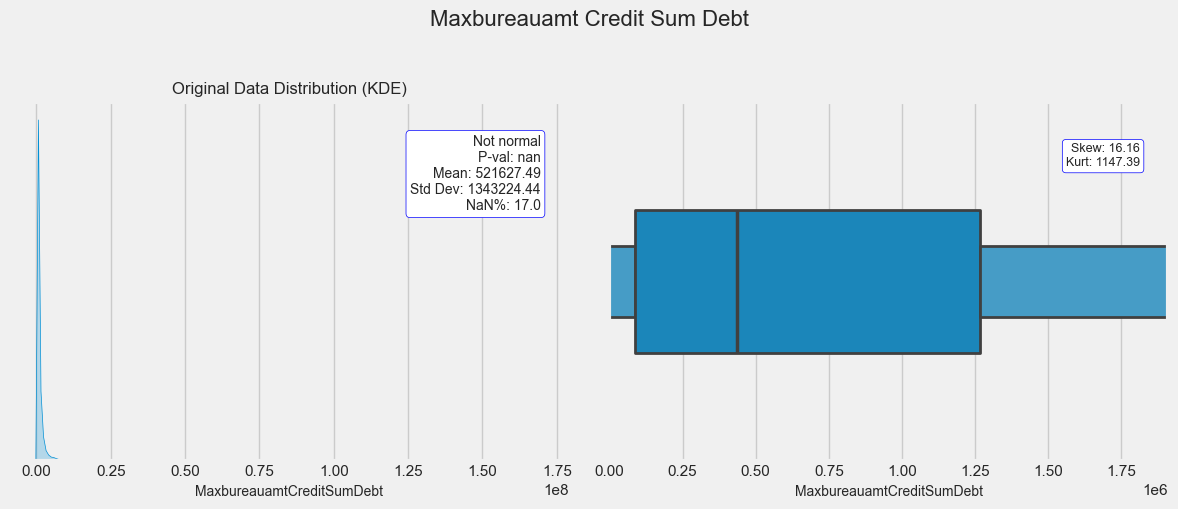

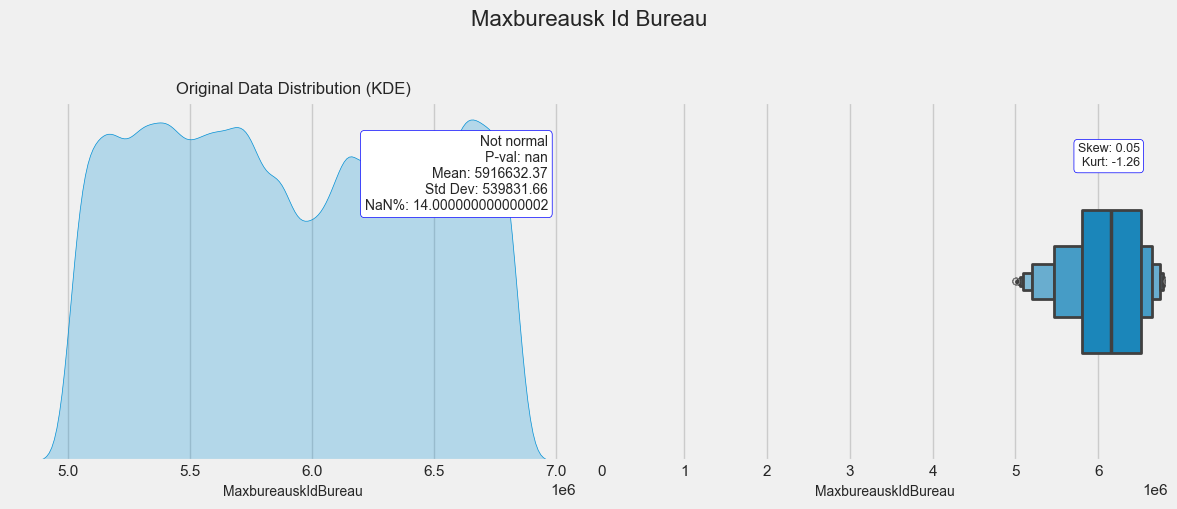

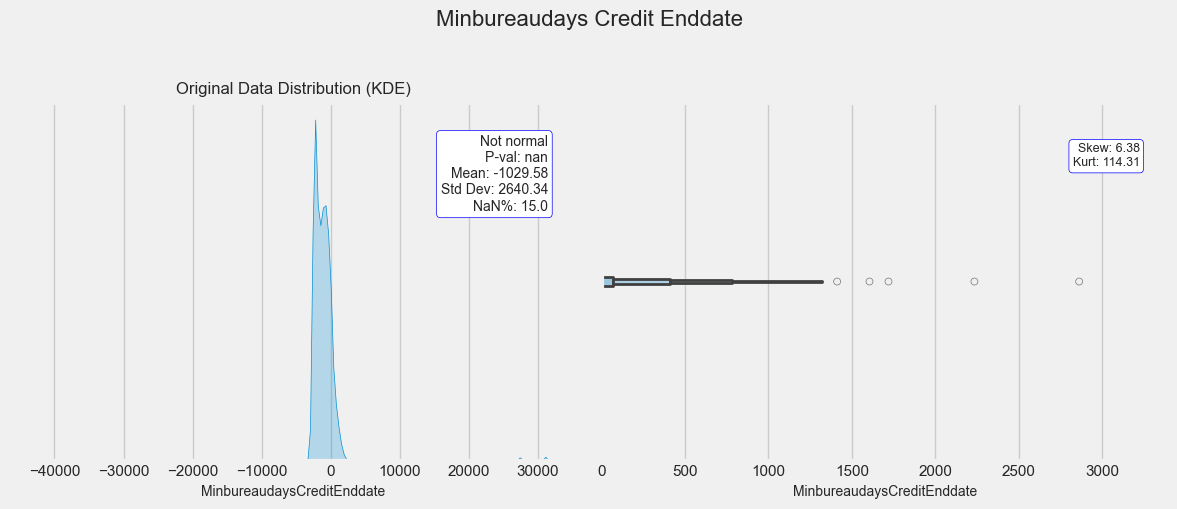

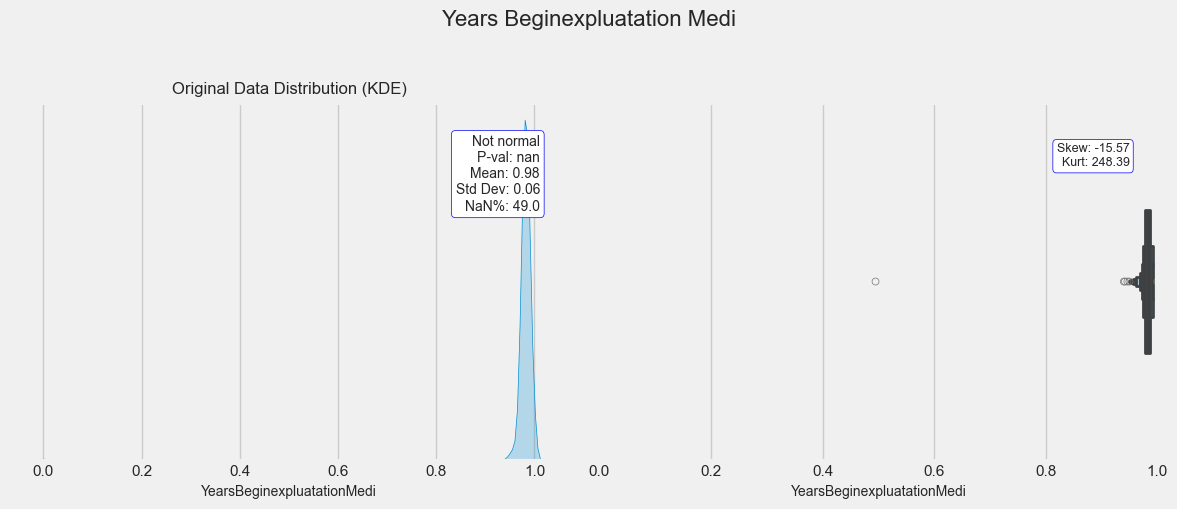

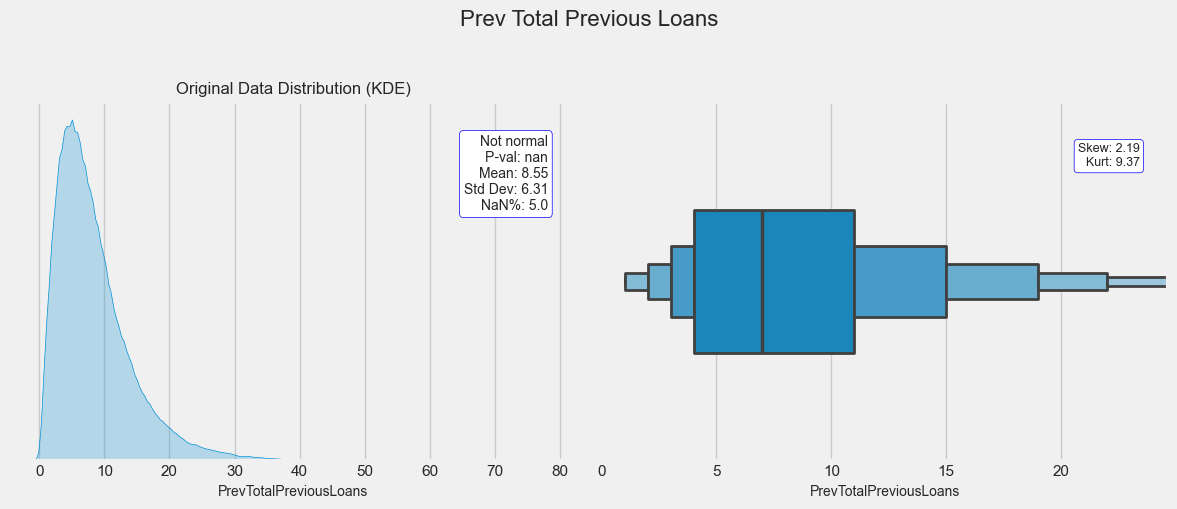

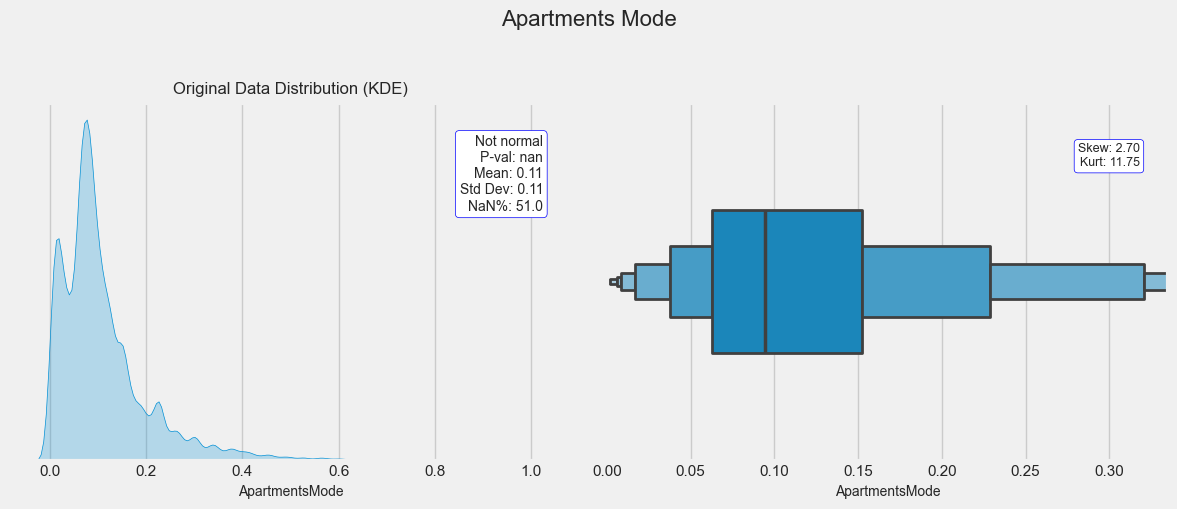

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


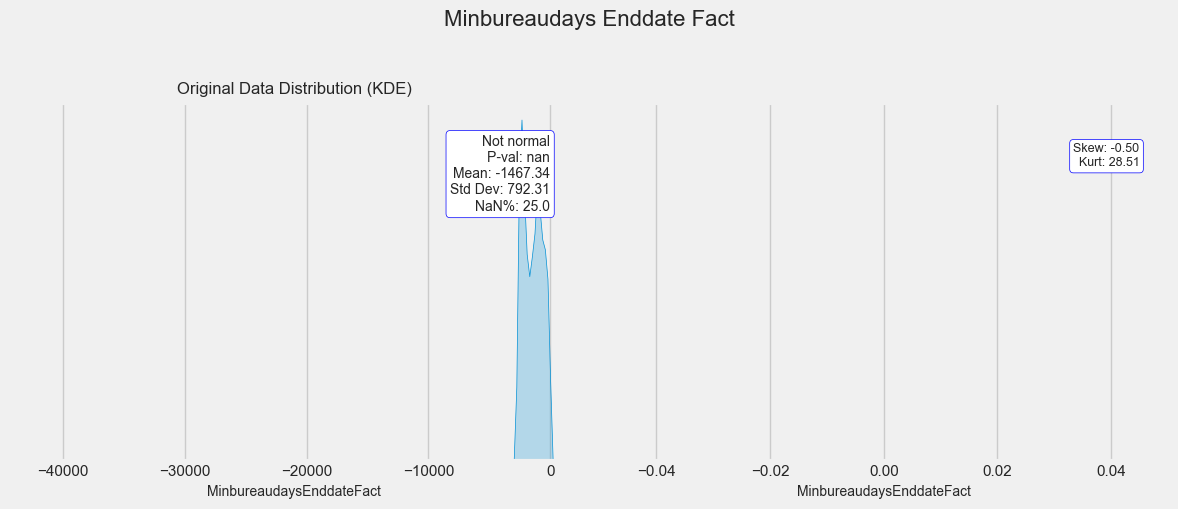

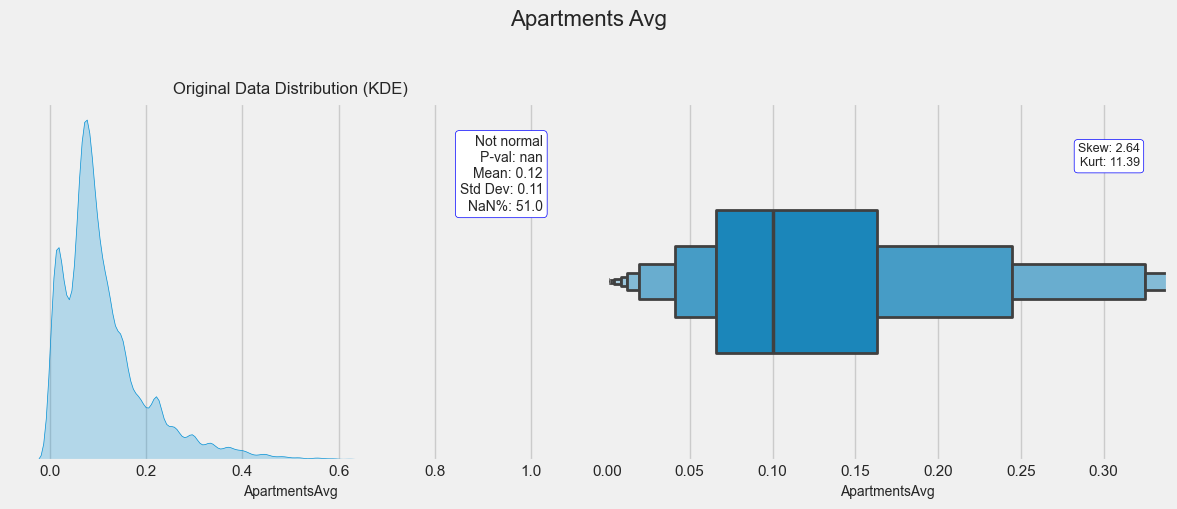

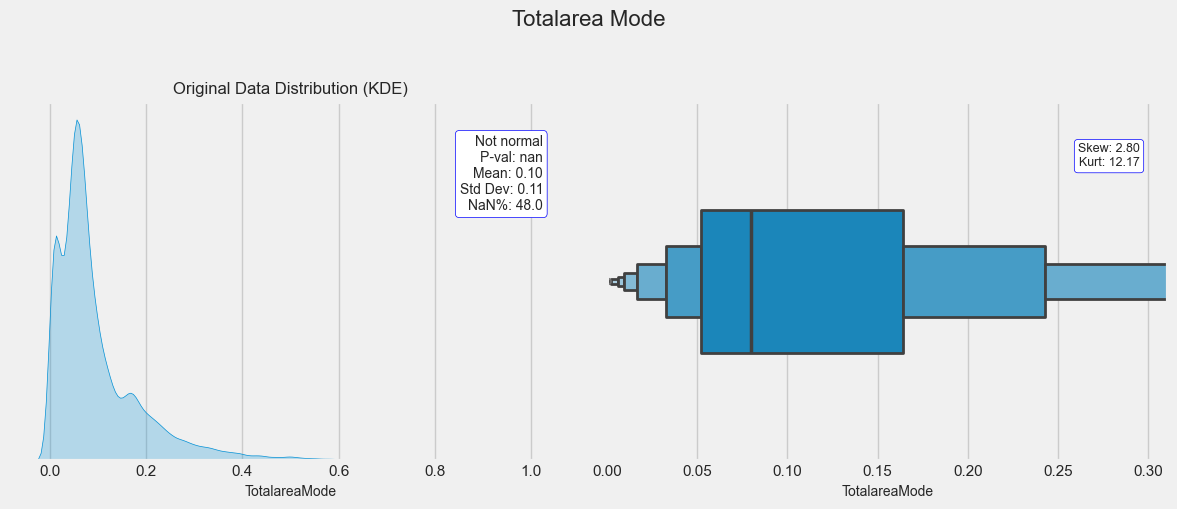

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


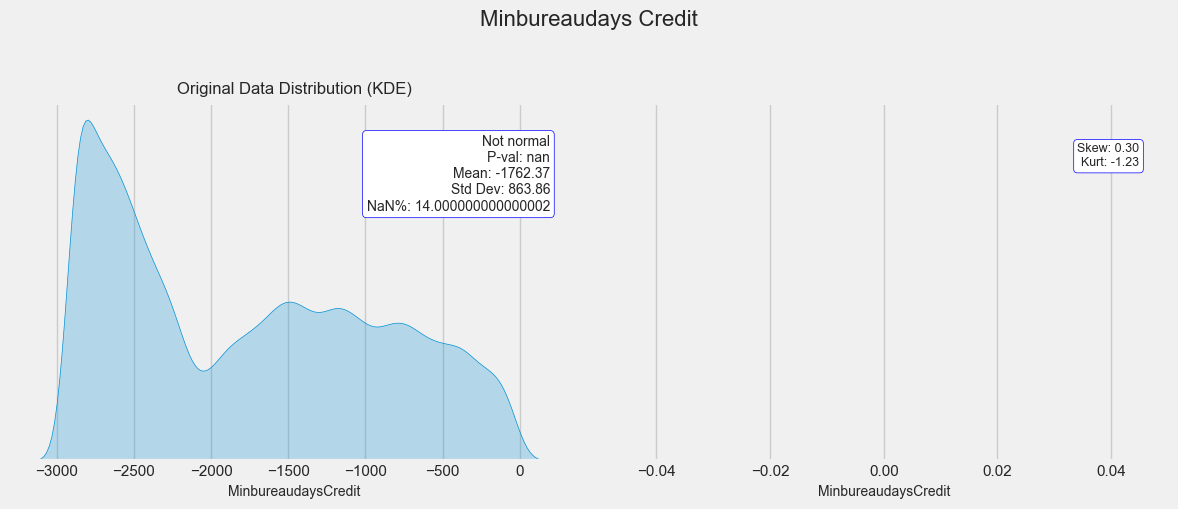

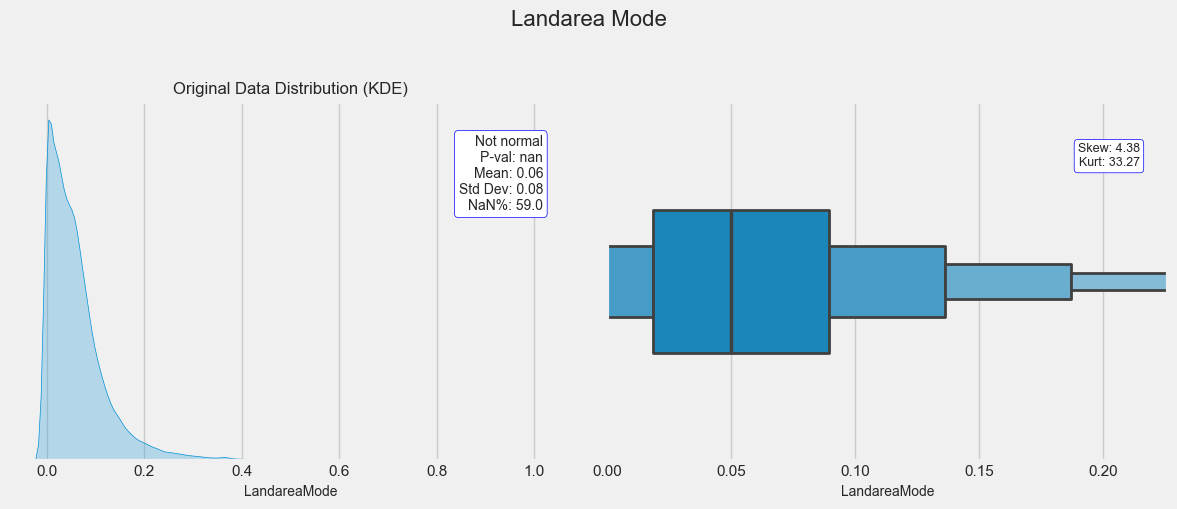

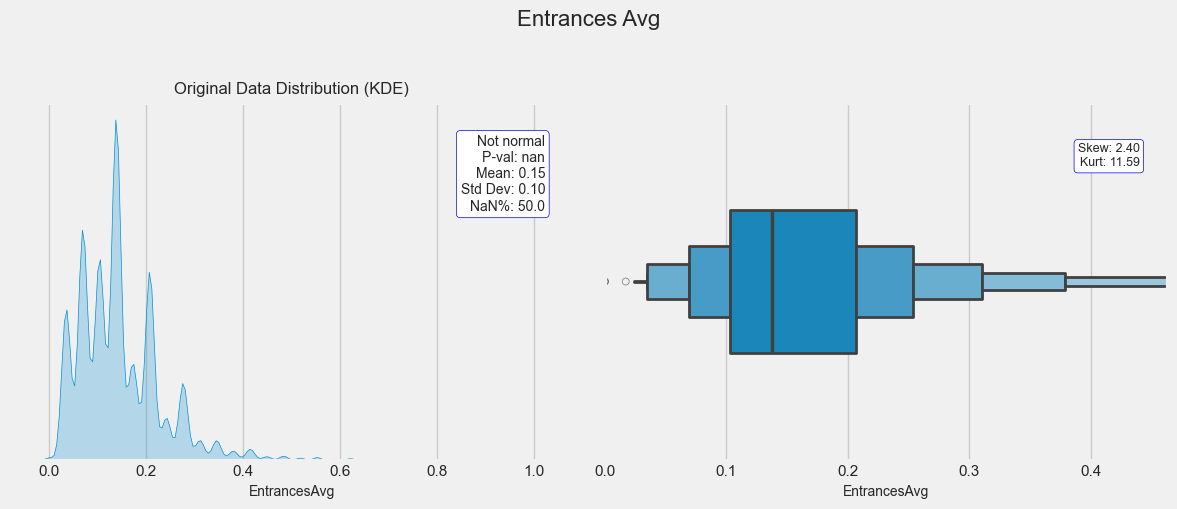

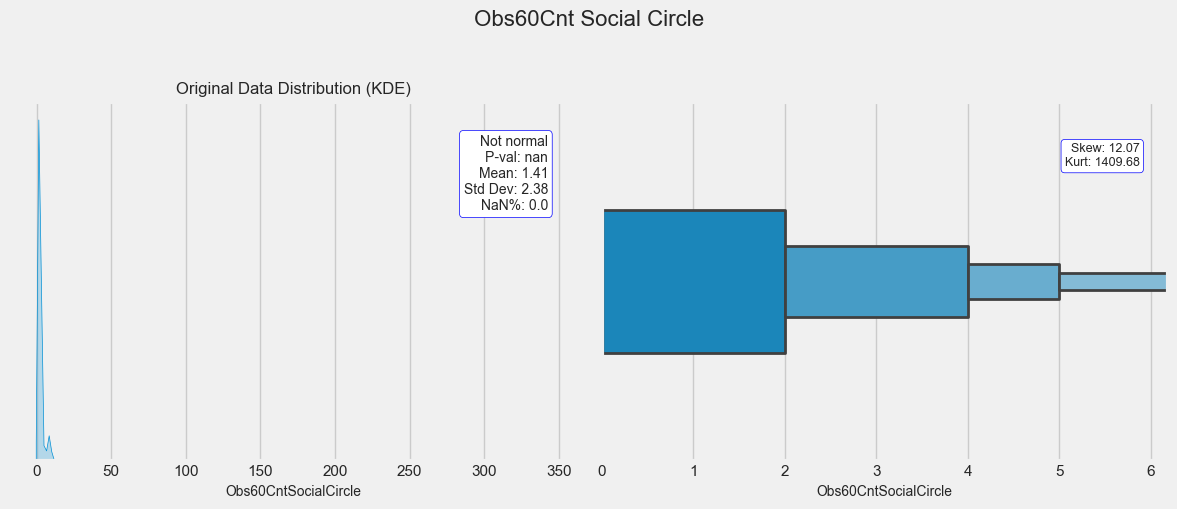

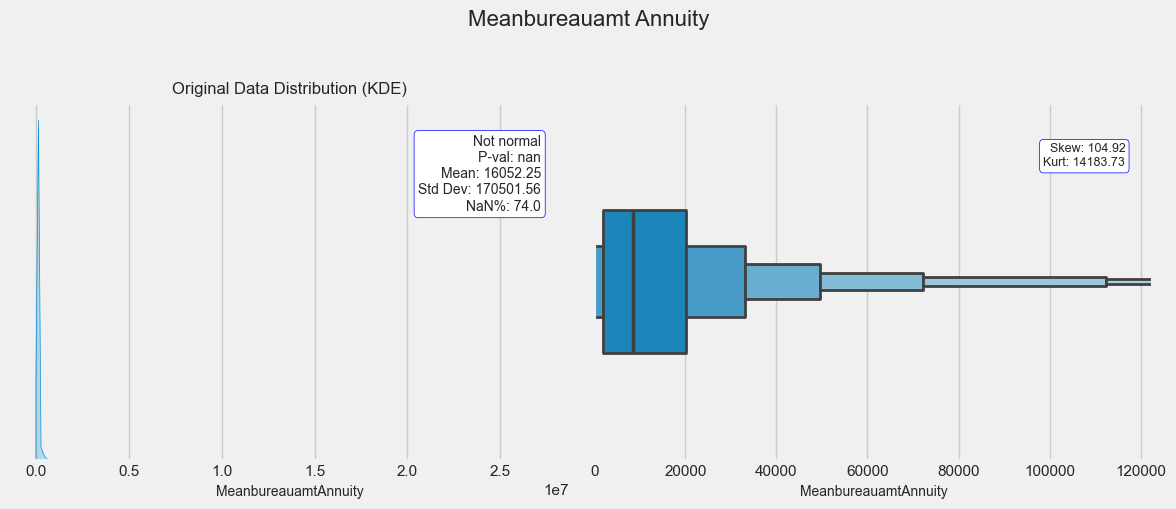

V:\projects\ppuodz-ML.4.1\shared\graph.py:1189: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  axes[1].set_xlim(0, min(upper_bound, source_df_no_cat[variable].max()))


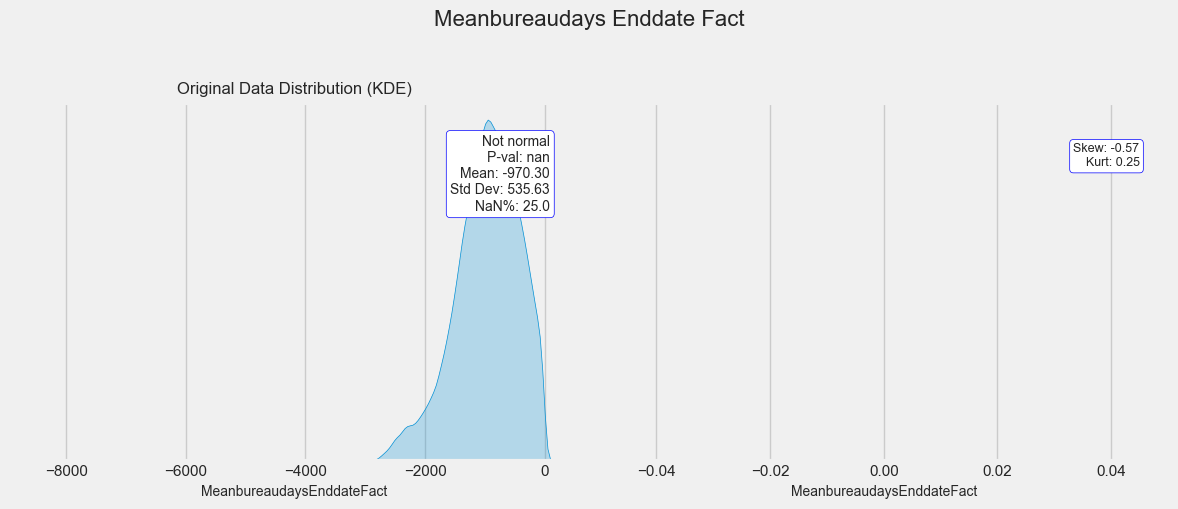

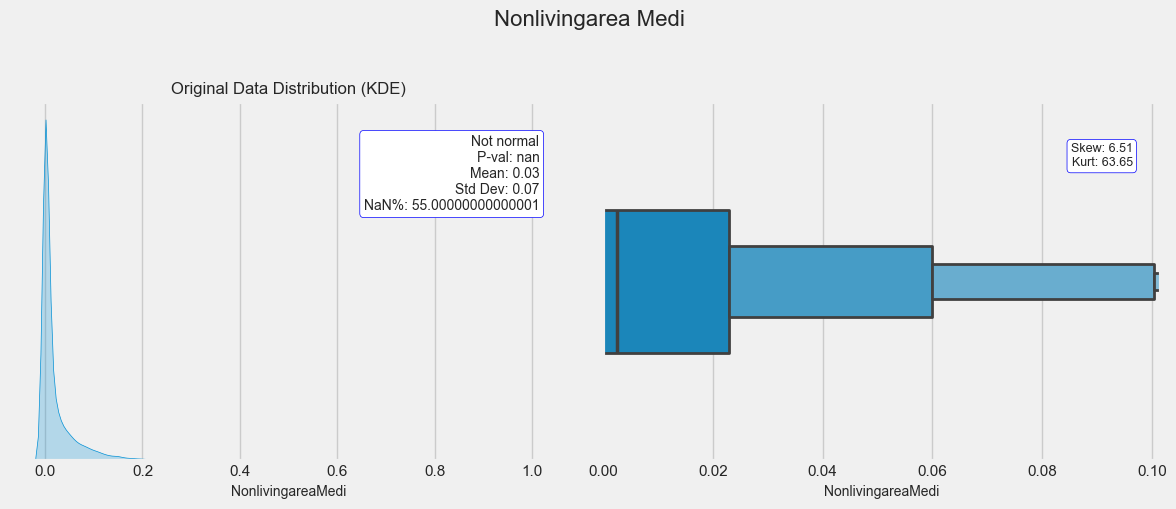

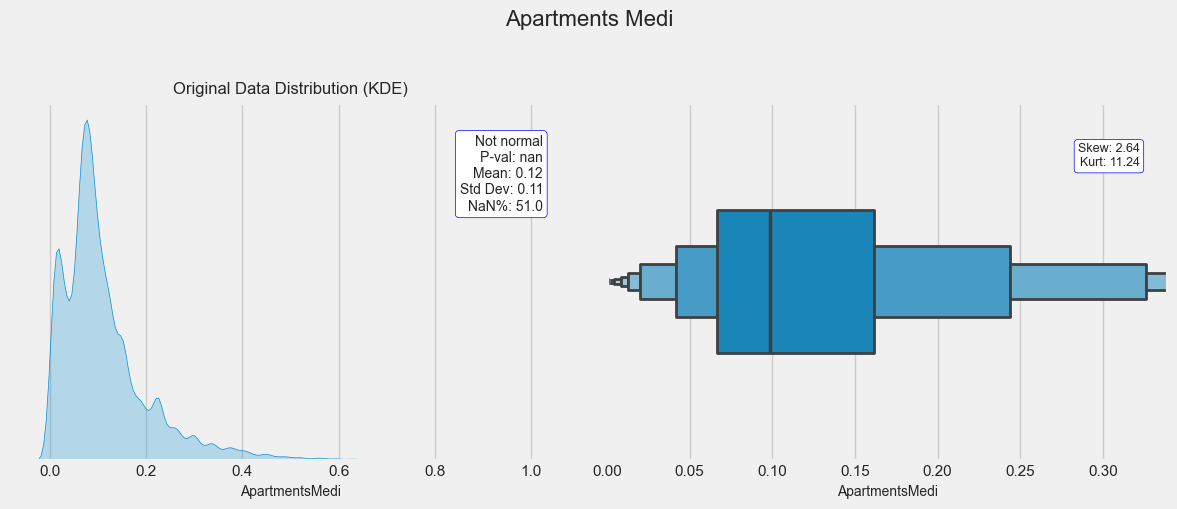

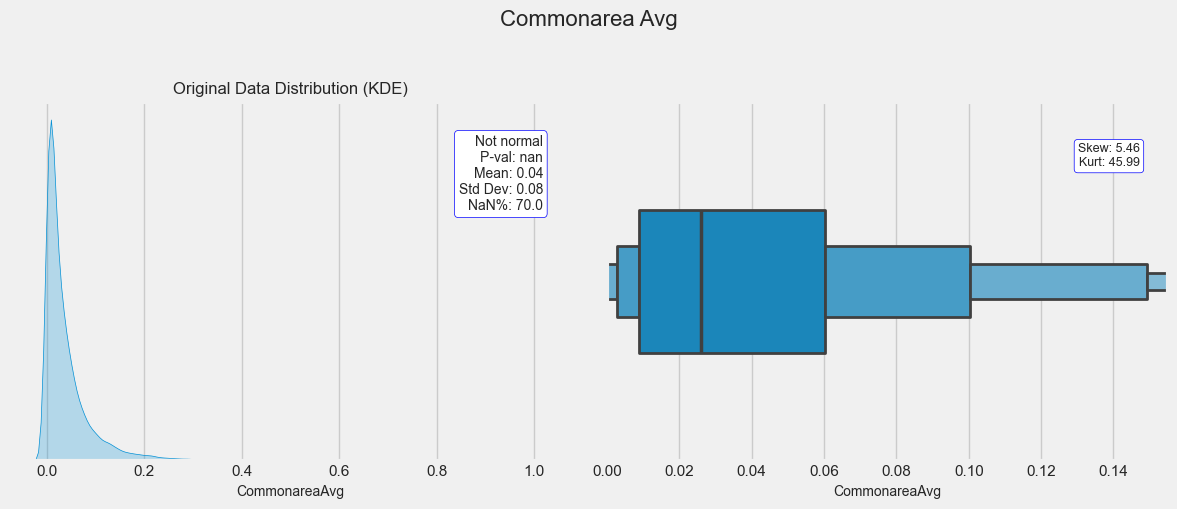

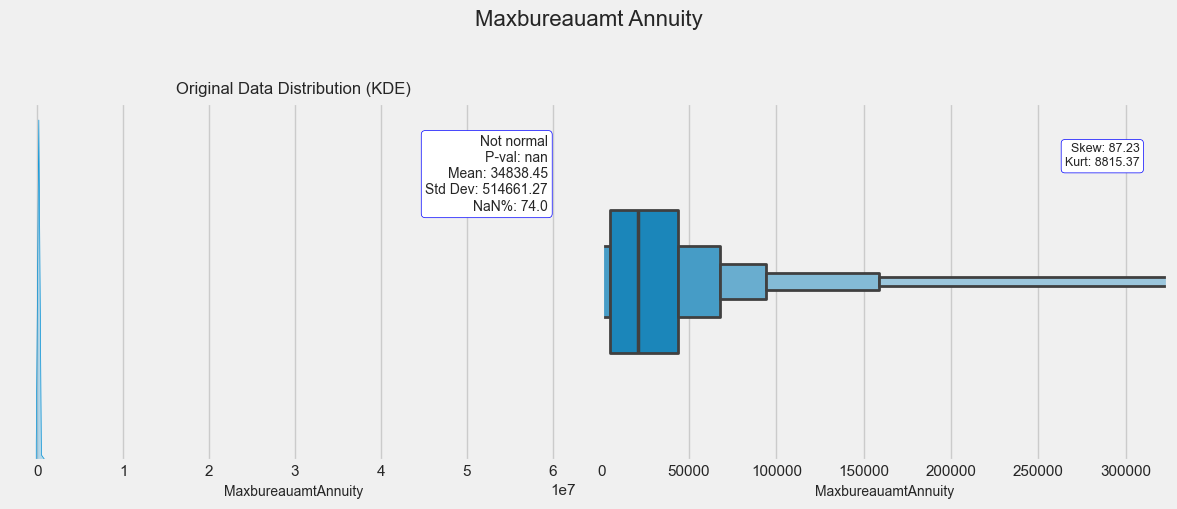

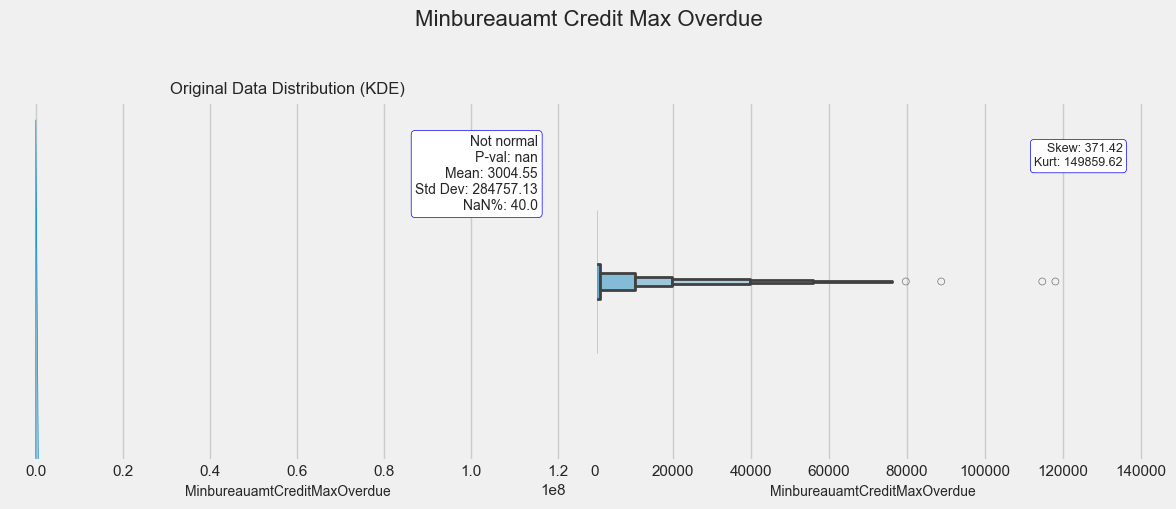

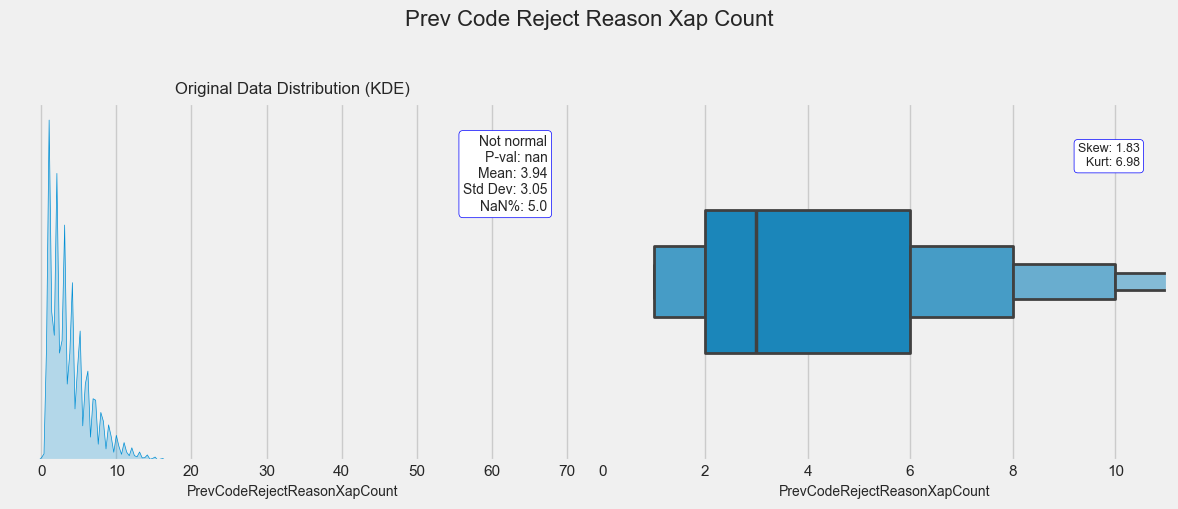

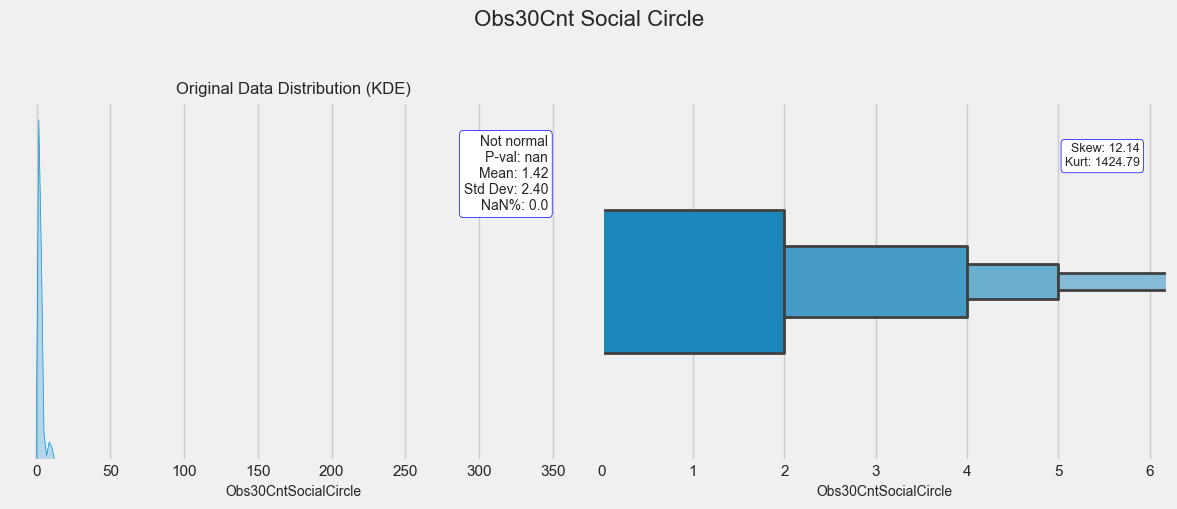

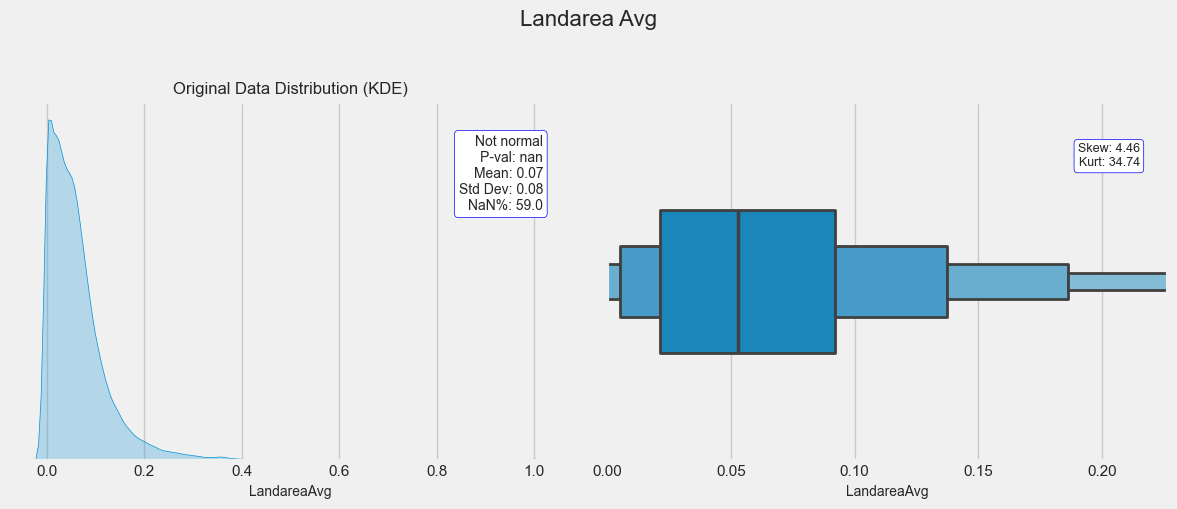

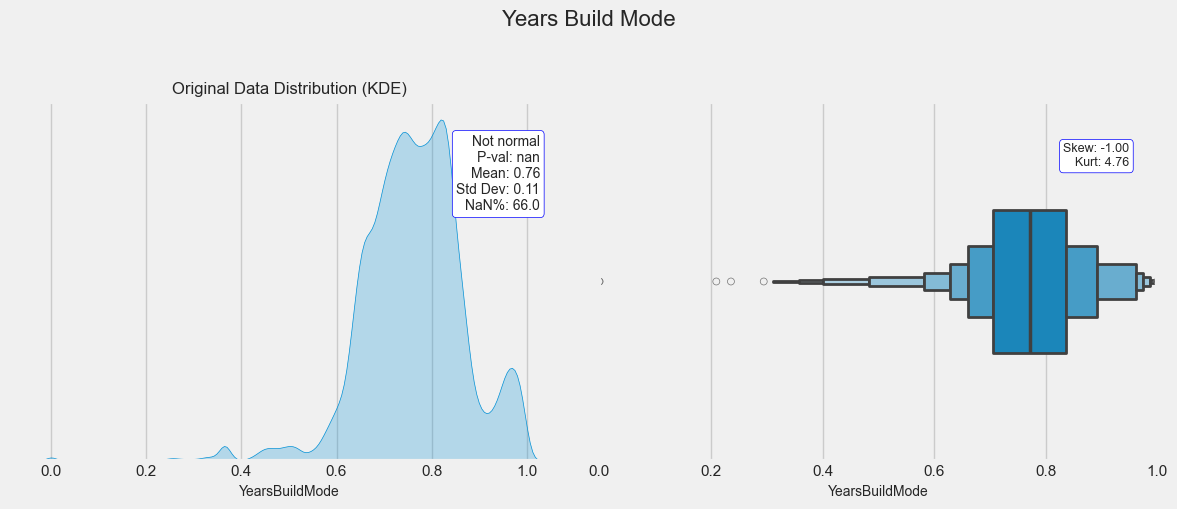

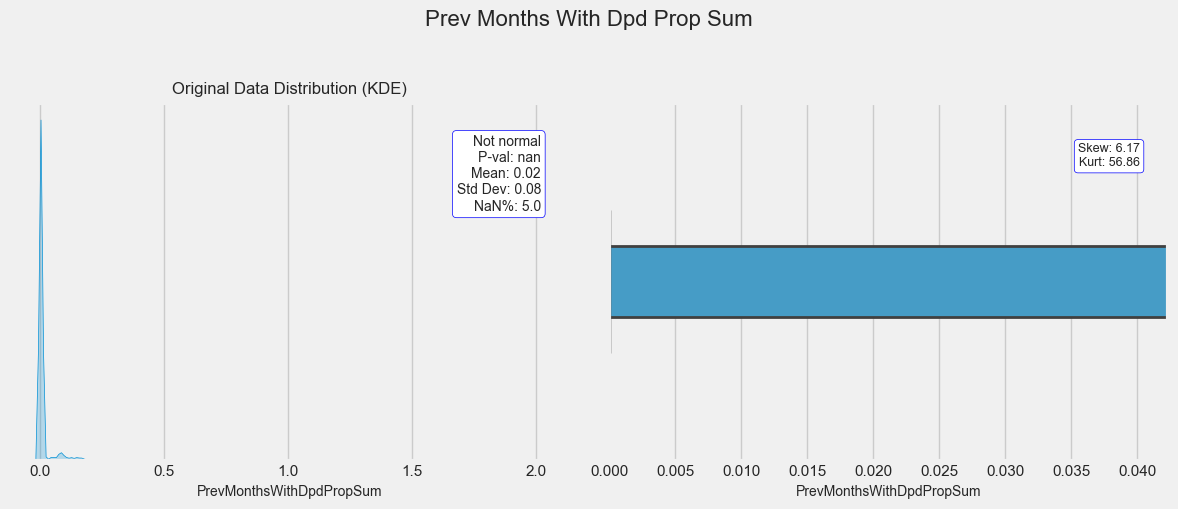

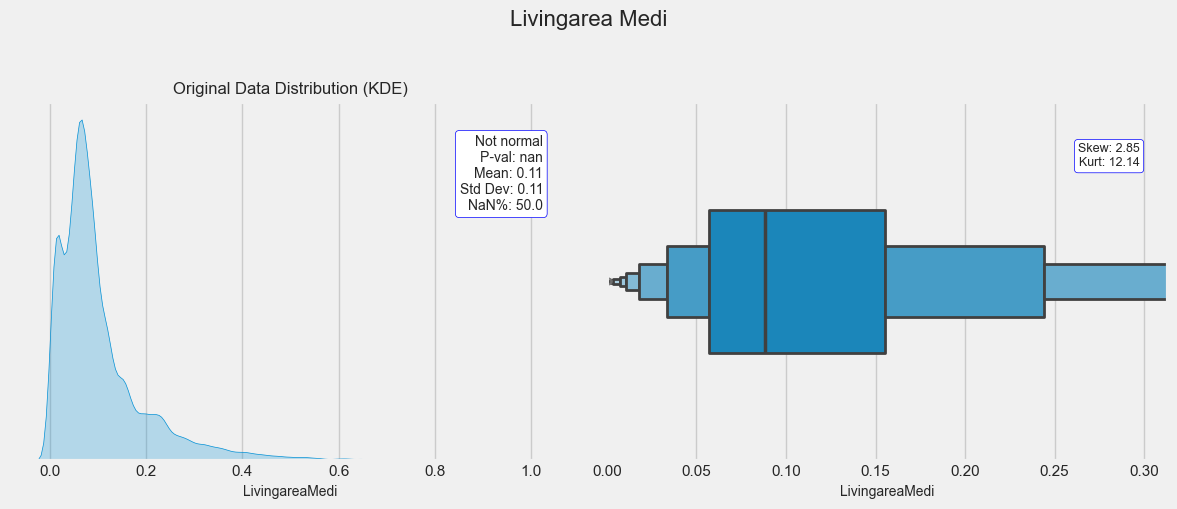

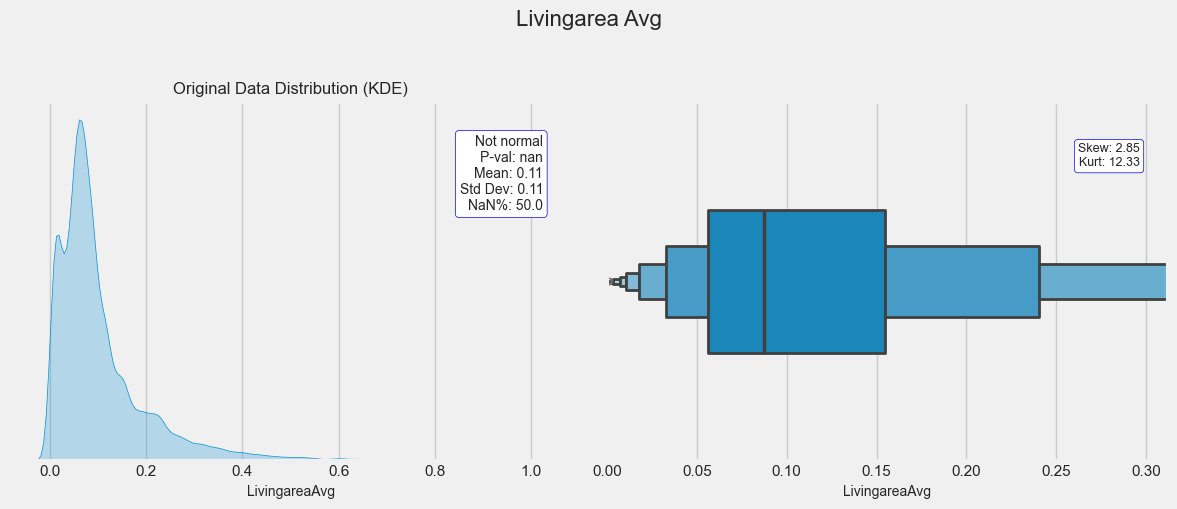

In [6]:
importlib.reload(graph)

graph.summary_df_features(features_matrix_sorted_imp)